# Supermarket Customer Analysis
***

## Dataset Overview

### Background Supermarket X 
Dataset ini mencakup informasi tentang pelanggan dari supermarket X, termasuk data demografis, pembelian produk, promosi yang telah dijalankan dan respons dari pelanggan terhadapnya, serta detail-detail tentang perilaku pembelian dan aktivitas kunjungan pelanggan di situs web supermarket pada tahun 2014.

**People:**
- ID: Identifikasi unik pelanggan
- Year_Birth: Tahun kelahiran pelanggan
- Education: Tingkat pendidikan pelanggan
- Marital_Status: Status perkawinan pelanggan
- Income: Pendapatan tahunan rumah tangga pelanggan
- Kidhome: Jumlah anak dalam rumah tangga pelanggan
- Teenhome: Jumlah remaja dalam rumah tangga pelanggan
- Dt_Customer: Tanggal pendaftaran pelanggan dengan perusahaan
- Recency: Jumlah hari sejak pembelian terakhir pelanggan
- Complain: 1 jika pelanggan mengeluh dalam 2 tahun terakhir, 0 jika tidak

**Product**
- MntWines: Jumlah yang dihabiskan untuk anggur dalam 2 tahun terakhir
- MntFruits: Jumlah yang dihabiskan untuk buah-buahan dalam 2 tahun terakhir
- MntMeatProducts: Jumlah yang dihabiskan untuk produk daging dalam 2 tahun terakhir
- MntFishProducts: Jumlah yang dihabiskan untuk produk ikan dalam 2 tahun terakhir
- MntSweetProducts: Jumlah yang dihabiskan untuk permen dalam 2 tahun terakhir
- MntGoldProds: Jumlah yang dihabiskan untuk emas dalam 2 tahun terakhir

**Promotion**
- NumDealsPurchases: Jumlah pembelian dengan diskon
- AcceptedCmp1: 1 jika pelanggan menerima tawaran dalam kampanye pertama, 0 jika tidak
- AcceptedCmp2: 1 jika pelanggan menerima tawaran dalam kampanye kedua, 0 jika tidak
- AcceptedCmp3: 1 jika pelanggan menerima tawaran dalam kampanye ketiga, 0 jika tidak
- AcceptedCmp4: 1 jika pelanggan menerima tawaran dalam kampanye keempat, 0 jika tidak
- AcceptedCmp5: 1 jika pelanggan menerima tawaran dalam kampanye kelima, 0 jika tidak
- Response: 1 jika pelanggan menerima tawaran dalam kampanye terakhir, 0 jika tidak

**Place**
- NumWebPurchases: Jumlah pembelian melalui situs web perusahaan
- NumCatalogPurchases: Jumlah pembelian menggunakan katalog
- NumStorePurchases: Jumlah pembelian langsung di toko
- NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir

### Background Problem
Supermarket X, di masa lalu memiliki masalah dengan program kampanye yang kurang menarik bagi anggotanya. Penyebabnya mungkin karena kurangnya daya tarik kampanye, kurangnya personalisasi dalam penawaran, atau ketidakpahaman tentang preferensi anggota. Namun, kampanye terakhir berhasil menarik lebih banyak pelanggan. Meskipun begitu, manajemen menyadari perlunya terus mengembangkan strategi kampanye yang efektif untuk mempertahankan minat anggota yang sudah ada. Mereka juga mengamati penurunan minat bergabung dalam keanggotaan yang perlu diatasi dengan pemahaman yang lebih baik tentang berbagai segmen pelanggan mereka. Dengan analisis segmentasi pasar, supermarket X dapat mengidentifikasi kelompok pelanggan dengan karakteristik serupa, membantu mereka mengembangkan strategi kampanye yang lebih efektif. Ini akan memungkinkan mereka menghadapi penurunan minat pelanggan dengan lebih baik di masa depan.

## Business Task

### Permasalahan Utama
Manajemen ingin menemukan cara untuk meningkatkan program kampanye mereka agar dapat mencegah penurunan minat pelanggan dalam bergabung dalam program membership, sambil juga membuat program kampanye lebih efektif dan relevan berdasarkan preferensi pelanggan, sehingga anggota yang sudah ada tetap aktif bertransaksi dan memberikan keuntungan yang lebih besar dan untuk pelanggan yang belum bergabung pada program membership ini dapat bergabung

### Rumusan Masalah
Tahapan untuk melakukan analisis:    
1. Identifikasi berbagai segmen pasar berdasarkan kategori yang relevan.  
    - Apakah terdapat hubungan antara Recency Customer dengan Minat Belanja?
    - Bagaimana pendapatan dapat mempengaruhi pola belanja pelanggan supermarket?
    - Apakah perbedaan Background Edukasi dapat mempengaruhi preferensi dan minat berbelanja?
    - Apakah ada korelasi antara usia dengan preferensi dan minat berbelanja?
    - Apakah pelanggan yang sudah menikah cenderung berbelanja lebih besar daripada pelanggan yang belum menikah?
    - Apakah pelanggan yang sudah memiliki anak dapat mempengaruhi pola berbelanja?
2. Evaluasi saluran pemasaran yang paling efisien.    
3. Memberikan kesimpulan dan rekomendasi strategi pemasaran.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import  warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Supermarket_Customers.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Data Cleaning

### Standarisasi Data

Karena nama-nama kolom pada dataset ini bervariasi, maka saya akan menstadarisasi nama-nama kolom dataset ini menggunakan metode penulisan **Camel Case**

In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
df.rename(columns={'Year_Birth' : 'yearBirth', 'Marital_Status' : 'maritalStatus', 
                   'Kidhome' : 'kidHome', 'Teenhome' : 'teenHome', 
                   'Dt_Customer' : 'dtCustomer', 'MntWines' : 'mntWines',
                   'MntFruits' : 'mntFruits','MntMeatProducts' : 'mntMeatProducts', 
                   'MntFishProducts' : 'mntFishProducts', 'MntSweetProducts': 'mntSweetProducts',
                   'MntGoldProds' : 'mntGoldProducts', 'NumDealsPurchases' : 'numDealsPurchases', 
                   'NumWebPurchases' : 'numWebPurchases', 'NumCatalogPurchases' : 'numCatalogPurchases', 
                   'NumStorePurchases' : 'numStorePurchases', 'NumWebVisitsMonth' : 'numWebVisitsMonth',
                   'AcceptedCmp3' : 'acceptedCmp3', 'AcceptedCmp4' : 'acceptedCmp4', 
                   'AcceptedCmp5' : 'acceptedCmp5', 'AcceptedCmp1' : 'acceptedCmp1','AcceptedCmp2' : 'acceptedCmp2',
                   'Z_CostContact' : 'ZCostContact', 'Z_Revenue' : 'ZRevenue'}, inplace=True)
df.head()

,ID,yearBirth,Education,maritalStatus,Income,kidHome,teenHome,dtCustomer,Recency,mntWines,...,numWebVisitsMonth,acceptedCmp3,acceptedCmp4,acceptedCmp5,acceptedCmp1,acceptedCmp2,Complain,ZCostContact,ZRevenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
pd.set_option('display.max_colwidth', None)

uniqueItem = []
for column in df.columns:
    uniqueItem.append([column, df[column].nunique(), df[column].unique(), df[column].dtype])

unique = pd.DataFrame(columns=['Column', 'Unique Count', 'Unique Value', 'Data Type'], data=uniqueItem)
unique

,Column,Unique Count,Unique Value,Data Type
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]",int64
1,yearBirth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]",int64
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]",object
3,maritalStatus,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]",object
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]",float64
5,kidHome,3,"[0, 1, 2]",int64
6,teenHome,3,"[0, 1, 2]",int64
7,dtCustomer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]",object
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]",int64
9,mntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55,

Dapat dilihat pada Kolom **dtCustomer** memiliki data type object. Kita akan mengubah data type kolom tersebut menjadi datetime agar lebih mudah untuk diolah

In [7]:
df['dtCustomer'] = pd.to_datetime(df['dtCustomer'], format='%d-%m-%Y')
df['yearBirth'] = df['yearBirth'].astype('int')

In [8]:
print(f"Data type kolom dtCustomer: {df.dtCustomer.dtype}")

Data type kolom dtCustomer: datetime64[ns]


Dapat dilihat pada kolom **Education** terdapat value berisi Master dan 2n Cycle, apabila dikutip dari website Università di Bologna (https://www.unibo.it/en/teaching/enrolment-transfer-and-final-examination/the-university-system/what-is-a-second-cycle-degree-programme), 2n Cycle merupakan istilah lain atau setara dengan Master Degree. Saya akan mengubah value 2n Cycle menjadi Master

In [9]:
df['Education'] = df['Education'].replace('2n Cycle','Master')
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

Lalu dapat dilihat pada kolom **maritalStatus** terdapat value Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO, dimana Together == Maried, Divorced == Widow, Alone == Single. Maka dari itu saya akan menstandarisasi value diatas.

In [10]:
df['maritalStatus'] = df['maritalStatus'].replace({'Alone' : 'Single', 'Together' : 'Married', 'Widow' : 'Divorced'})
df['maritalStatus'].unique()

array(['Single', 'Married', 'Divorced', 'Absurd', 'YOLO'], dtype=object)

Untuk Value Absurd dan YOLO akan di drop karena value tidak berkaitan dan akan merubah value apabila dipaksakan untuk diimputasi. Lagipula data hanya ada 4 saja yang apabila di prosentasekan tidak sampai 1% dari keseluruhan data

In [11]:
df[df['maritalStatus'] == 'Absurd']

,ID,yearBirth,Education,maritalStatus,Income,kidHome,teenHome,dtCustomer,Recency,mntWines,...,numWebVisitsMonth,acceptedCmp3,acceptedCmp4,acceptedCmp5,acceptedCmp1,acceptedCmp2,Complain,ZCostContact,ZRevenue,Response
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,1,0,0,1,1,0,0,3,11,1
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,...,2,0,0,0,0,0,0,3,11,0


In [12]:
df[df['maritalStatus'] == 'YOLO']

,ID,yearBirth,Education,maritalStatus,Income,kidHome,teenHome,dtCustomer,Recency,mntWines,...,numWebVisitsMonth,acceptedCmp3,acceptedCmp4,acceptedCmp5,acceptedCmp1,acceptedCmp2,Complain,ZCostContact,ZRevenue,Response
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,0,3,11,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,0,3,11,1


In [13]:
df = df[(df['maritalStatus'] != 'Absurd') & (df['maritalStatus'] != 'YOLO')]
df['maritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

### Menambahkan kolom Age dari tahun asumsi data ini diambil, yaitu 2014 dan dikurangi values dari kolom **yearBirth**

In [14]:
df['Age'] = 2014 - df['yearBirth']
df.head()

,ID,yearBirth,Education,maritalStatus,Income,kidHome,teenHome,dtCustomer,Recency,mntWines,...,acceptedCmp3,acceptedCmp4,acceptedCmp5,acceptedCmp1,acceptedCmp2,Complain,ZCostContact,ZRevenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,57
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,60
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,49
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,33


Menambahkan kolom haveChild, dan childCount dari kolom **kidHome** dan **teenHome** untuk mempermudah analisis. Kolom **haveChild** didapatkan apabila pada kolom **kidHome** dan **teenHome** != 0 dan outputnya adalah 'Yes' atau 'No'. Untuk kolom **childCount** didapatkan dari kolom **kidHome** + dengan kolom **teenHome**

In [15]:
df['haveChild'] = df.apply(lambda row: 'Yes' if row['kidHome'] != 0 or row['teenHome'] != 0 else 'No', axis=1)
df.head()

,ID,yearBirth,Education,maritalStatus,Income,kidHome,teenHome,dtCustomer,Recency,mntWines,...,acceptedCmp4,acceptedCmp5,acceptedCmp1,acceptedCmp2,Complain,ZCostContact,ZRevenue,Response,Age,haveChild
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,57,No
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,60,Yes
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,49,No
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,30,Yes
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,33,Yes


In [16]:
df['childCount'] = df['kidHome'] + df['teenHome']
df.head()

,ID,yearBirth,Education,maritalStatus,Income,kidHome,teenHome,dtCustomer,Recency,mntWines,...,acceptedCmp5,acceptedCmp1,acceptedCmp2,Complain,ZCostContact,ZRevenue,Response,Age,haveChild,childCount
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,57,No,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,60,Yes,2
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,49,No,0
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,30,Yes,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,33,Yes,1


### Handling missing values

In [17]:
df.isna().sum()

ID                      0
yearBirth               0
Education               0
maritalStatus           0
Income                 24
kidHome                 0
teenHome                0
dtCustomer              0
Recency                 0
mntWines                0
mntFruits               0
mntMeatProducts         0
mntFishProducts         0
mntSweetProducts        0
mntGoldProducts         0
numDealsPurchases       0
numWebPurchases         0
numCatalogPurchases     0
numStorePurchases       0
numWebVisitsMonth       0
acceptedCmp3            0
acceptedCmp4            0
acceptedCmp5            0
acceptedCmp1            0
acceptedCmp2            0
Complain                0
ZCostContact            0
ZRevenue                0
Response                0
Age                     0
haveChild               0
childCount              0
dtype: int64

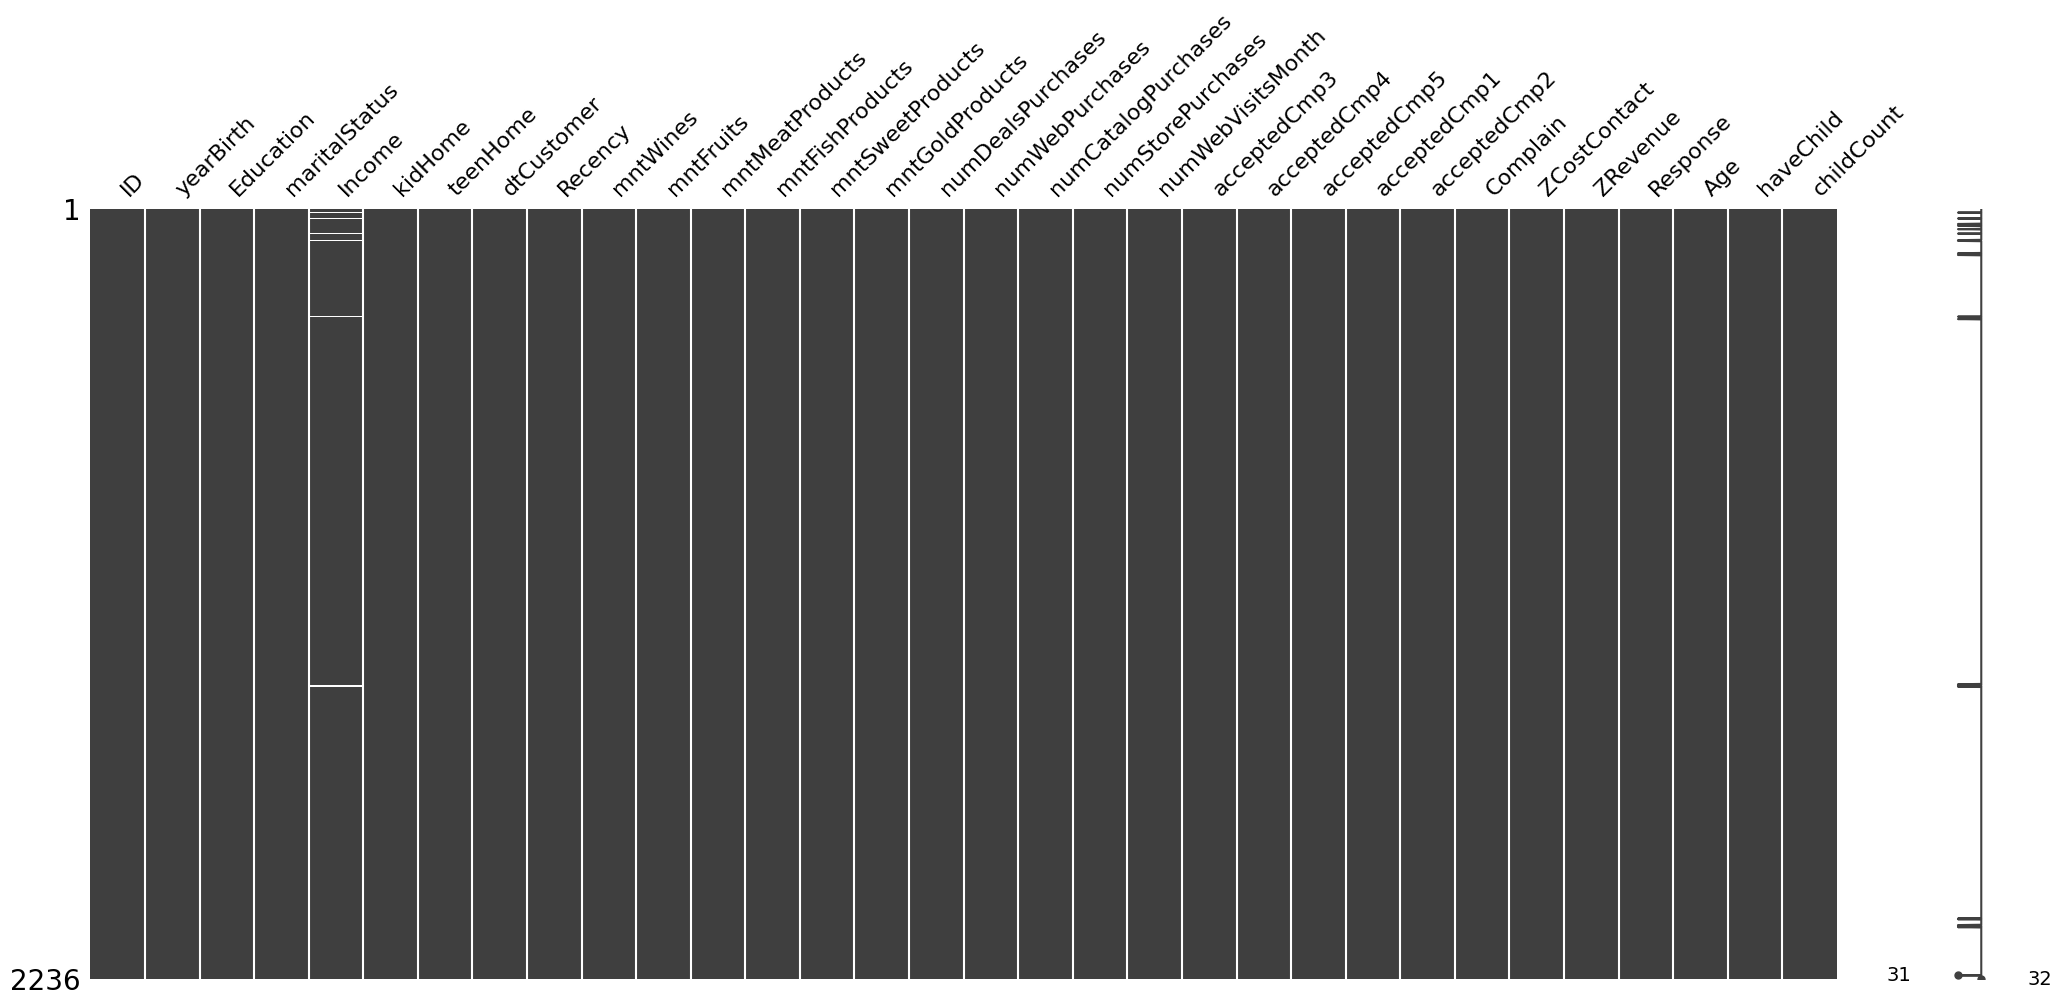

In [18]:
msno.matrix(df);

Dapat dilihat bahwa terdapat 24 missing value di kolom **Income**. Mari kita lihat ada berapa missing value yang berada di kolom **Income**

In [19]:
df[df['Income'] != df['Income'].values]

,ID,yearBirth,Education,maritalStatus,Income,kidHome,teenHome,dtCustomer,Recency,mntWines,...,acceptedCmp5,acceptedCmp1,acceptedCmp2,Complain,ZCostContact,ZRevenue,Response,Age,haveChild,childCount
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,0,0,0,3,11,0,31,Yes,1
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,0,0,3,11,0,28,Yes,1
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,0,0,0,0,3,11,0,55,No,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,0,0,0,0,3,11,0,63,Yes,3
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,0,0,0,3,11,0,32,Yes,1
71,10629,1973,Master,Married,NaN,1,0,2012-09-14,25,25,...,0,0,0,0,3,11,0,41,Yes,1
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,0,0,0,0,3,11,0,57,Yes,3
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,0,0,0,3,11,0,57,Yes,2
92,5798,1973,Master,Married,NaN,0,0,2013-11-23,87,445,...,0,0,0,0,3,11,0,41,No,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,0,0,0,0,3,11,0,53,Yes,1


Karena kolom **Income** memiliki peran krusial dalam analisis, saya akan mencoba melakukan pengisian data yang hilang (imputasi) berdasarkan kolom **Education** dan **MaritalStatus**. Asumsinya adalah bahwa pendapatan seseorang dapat dipengaruhi oleh tingkat pendidikan dan status pernikahan. Jika seseorang memiliki tingkat pendidikan yang lebih tinggi, maka pendapatannya cenderung lebih tinggi daripada mereka yang memiliki tingkat pendidikan yang lebih rendah. Selain itu, status pernikahan juga dapat memengaruhi pendapatan, terutama jika pendapatan yang tercatat adalah gabungan dari kedua pasangan.

Sebelum mengambil langkah selanjutnya, saya akan memvisualisasikan hubungan antara tingkat pendidikan dan status pernikahan terhadap pendapatan. Untuk itu, saya akan menggunakan heatmap. Tujuannya adalah untuk memastikan bahwa asumsi saya berasaskan pada hubungan yang kuat dan dapat diandalkan. Setelah analisis visual ini, saya akan memutuskan apakah akan menggunakan Mean atau Median untuk mengisi nilai yang hilang sesuai dengan karakteristik distribusi data pendapatan.

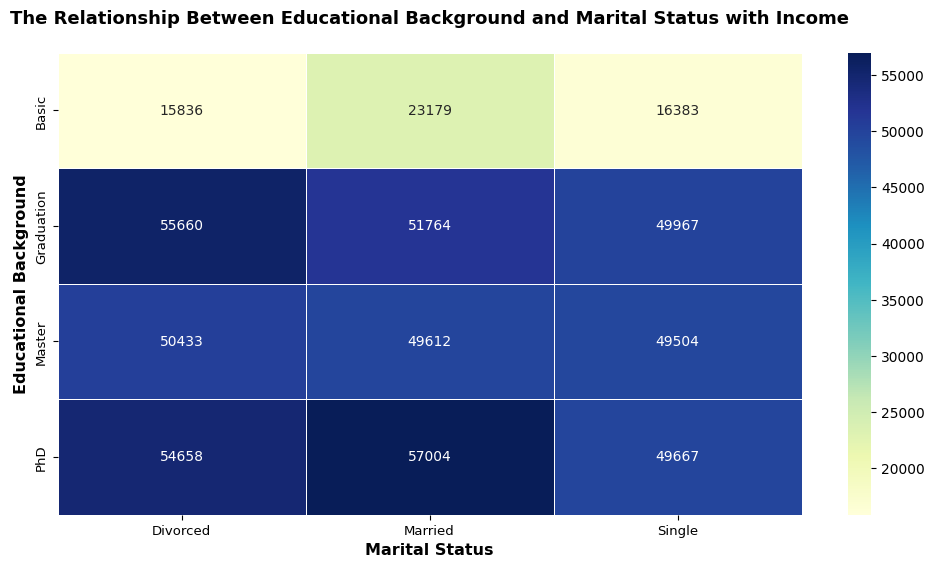

In [20]:
heatmapData = df.groupby(['Education', 'maritalStatus'])['Income'].median().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmapData, annot=True, fmt='.0f', cmap='YlGnBu', cbar=True, linewidths=0.5)
plt.title('The Relationship Between Educational Background and Marital Status with Income\n', fontsize=13, fontweight='bold')
plt.xlabel('Marital Status', fontsize=11.5, fontweight='bold')
plt.ylabel('Educational Background', fontsize=11.5, fontweight='bold')
plt.xticks(fontsize=9.5)
plt.yticks(fontsize=9.5)
plt.show()

Berdasarkan heatmap di atas, dapat disimpulkan bahwa terdapat korelasi yang kuat antara Education dan Marital status, kecuali untuk kategori basic dalam Education. Meskipun demikian, karena terdapat korelasi yang signifikan dari kategori-kategori lainnya, maka keputusan diambil untuk menggunakan kombinasi latar belakang pendidikan dan status pernikahan dalam pengimputasian nilai yang hilang pada kolom **Income**.

Namun, sebelum melakukan proses imputasi, akan dilakukan pemeriksaan distribusi data Income terlebih dahulu. Hal ini dilakukan untuk memutuskan apakah akan menggunakan nilai Mean atau nilai Median dalam pengimputasian data yang hilang, sesuai dengan karakteristik distribusi data pendapatan.

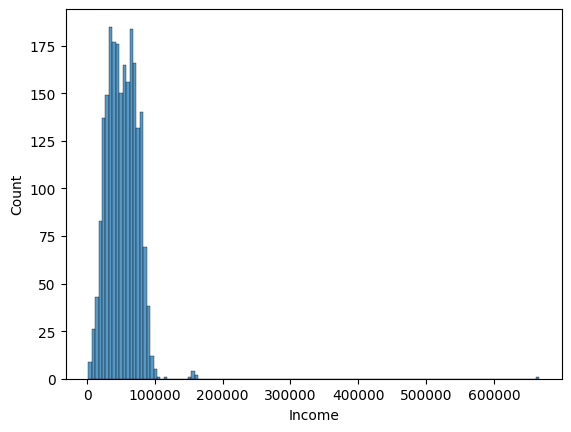

In [21]:
sns.histplot(df, x='Income');

Ternyata ditemukan sebuah outlier pada kolom **Income**

In [22]:
df['Income'].sort_values(ascending=False).head(10)

2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
1653    157146.0
2132    156924.0
655     153924.0
1898    113734.0
646     105471.0
Name: Income, dtype: float64

In [23]:
df.loc[df['Income'] > 150000, ['Education', 'maritalStatus', 'Income']].sort_values(by='Income', ascending=False)

,Education,maritalStatus,Income
2233,Graduation,Married,666666.0
617,PhD,Married,162397.0
687,PhD,Married,160803.0
1300,Master,Married,157733.0
164,PhD,Married,157243.0
1653,Graduation,Married,157146.0
2132,PhD,Married,156924.0
655,Graduation,Divorced,153924.0


In [24]:
round(df['Income'].loc[df['Income'] != 666666.0].mean())

51955

Padahal rata-rata dari kolom **Income** adalah 51970. Maka dari itu, kita akan drop data yang memiliki Income sebanyak 666666.0 karena dapat berpengaruh terhadap distribusi data. Namun untuk Income 162397.0 hingga 153924.0 akan dibiarkan karena saya berasumsi bahwa memang pelanggan tersebut memiliki income yang tinggi berdasarkan Educationnya dan Marital Statusnya

In [25]:
df = df[df['Income'] != 666666.0]
df['Income'].sort_values(ascending=False).head(10)

617     162397.0
687     160803.0
1300    157733.0
164     157243.0
1653    157146.0
2132    156924.0
655     153924.0
1898    113734.0
646     105471.0
252     102692.0
Name: Income, dtype: float64

Setelah outlier pada kolom **Income** sudah di drop, kita akan melihat distribusi datanya

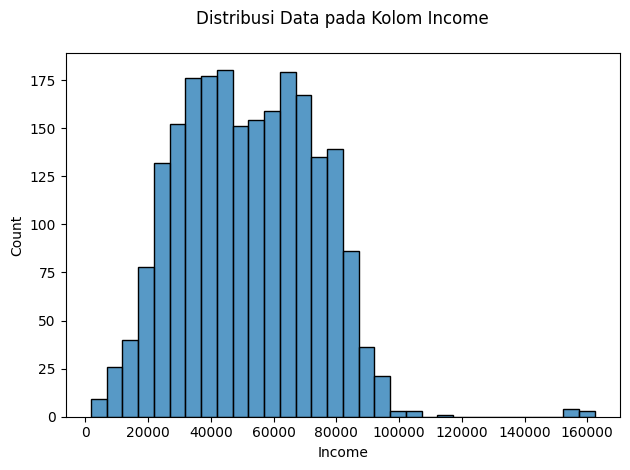

In [26]:
# Menggunakan visualisasi untuk mengetes apakah distribusi data normal atau tidak
sns.histplot(df, x='Income')
plt.title('Distribusi Data pada Kolom Income\n')
plt.tight_layout();

In [27]:
from scipy.stats import shapiro, kstest, normaltest

# Menggunakan Shapiro-Wilk test untuk mengetes apakah distribusi data normal atau tidak
shapiroTest = shapiro(df['Income'])
print('Shapiro-Wilk Test:')
print(f'Statistic: {shapiroTest[0]}')
print(f'p-value: {shapiroTest[1]}')
alpha = 0.05
if shapiroTest[1] > alpha:
    print('Sample Normal')
else:
    print('Sample Not Normal')

# Menggunakan kstest untuk mengetes apakah distribusi data normal atau tidak
ksTest = kstest(df['Income'], 'norm')
print('\nKolmogorov-Smirnov Test:')
print(f'Statistic: {ksTest[0]}')
print(f'p-value: {ksTest[1]}')
if ksTest[1] > alpha:
    print('Sample Normal')
else:
    print('Sample Not Normal')

# Menggunakan normaltest untuk mengetes apakah distribusi data normal atau tidak
normalTest = normaltest(df['Income'])
print('\nNormal Test:')
print(f'Statistic: {normalTest[0]}')
print(f'p-value: {normalTest[1]}')
if normalTest[1] > alpha:
    print('Sample Normal')
else:
    print('Sample Not Normal')

Shapiro-Wilk Test:
Statistic: nan
p-value: 1.0
Sample Normal

Kolmogorov-Smirnov Test:
Statistic: nan
p-value: nan
Sample Not Normal

Normal Test:
Statistic: nan
p-value: nan
Sample Not Normal


Hasil yang didapatkan adalah data dalam kolom **Income** tidak berdistribusi normal. Maka dari itu, kita akan mengisi missing values pada kolom **Income** menggunakan median dari kolom **Income** berdasarkan **Education** dan **MaritalStatus**

In [28]:
# Median income berdasarkan Education dan maritalStatus

df[df['Income'].isna()][['ID','Education', 'maritalStatus', 'Income']].merge(df.groupby(['Education', 'maritalStatus'])['Income'].median(), on=['Education', 'maritalStatus'], suffixes=('_original', '_median'))

,ID,Education,maritalStatus,Income_original,Income_median
0,1994,Graduation,Married,NaN,51651.0
1,1295,Graduation,Married,NaN,51651.0
2,2437,Graduation,Married,NaN,51651.0
3,2902,Graduation,Married,NaN,51651.0
4,5079,Graduation,Married,NaN,51651.0
5,5255,Graduation,Single,NaN,49967.0
6,7244,Graduation,Single,NaN,49967.0
7,8557,Graduation,Single,NaN,49967.0
8,9235,Graduation,Single,NaN,49967.0
9,2863,Graduation,Single,NaN,49967.0


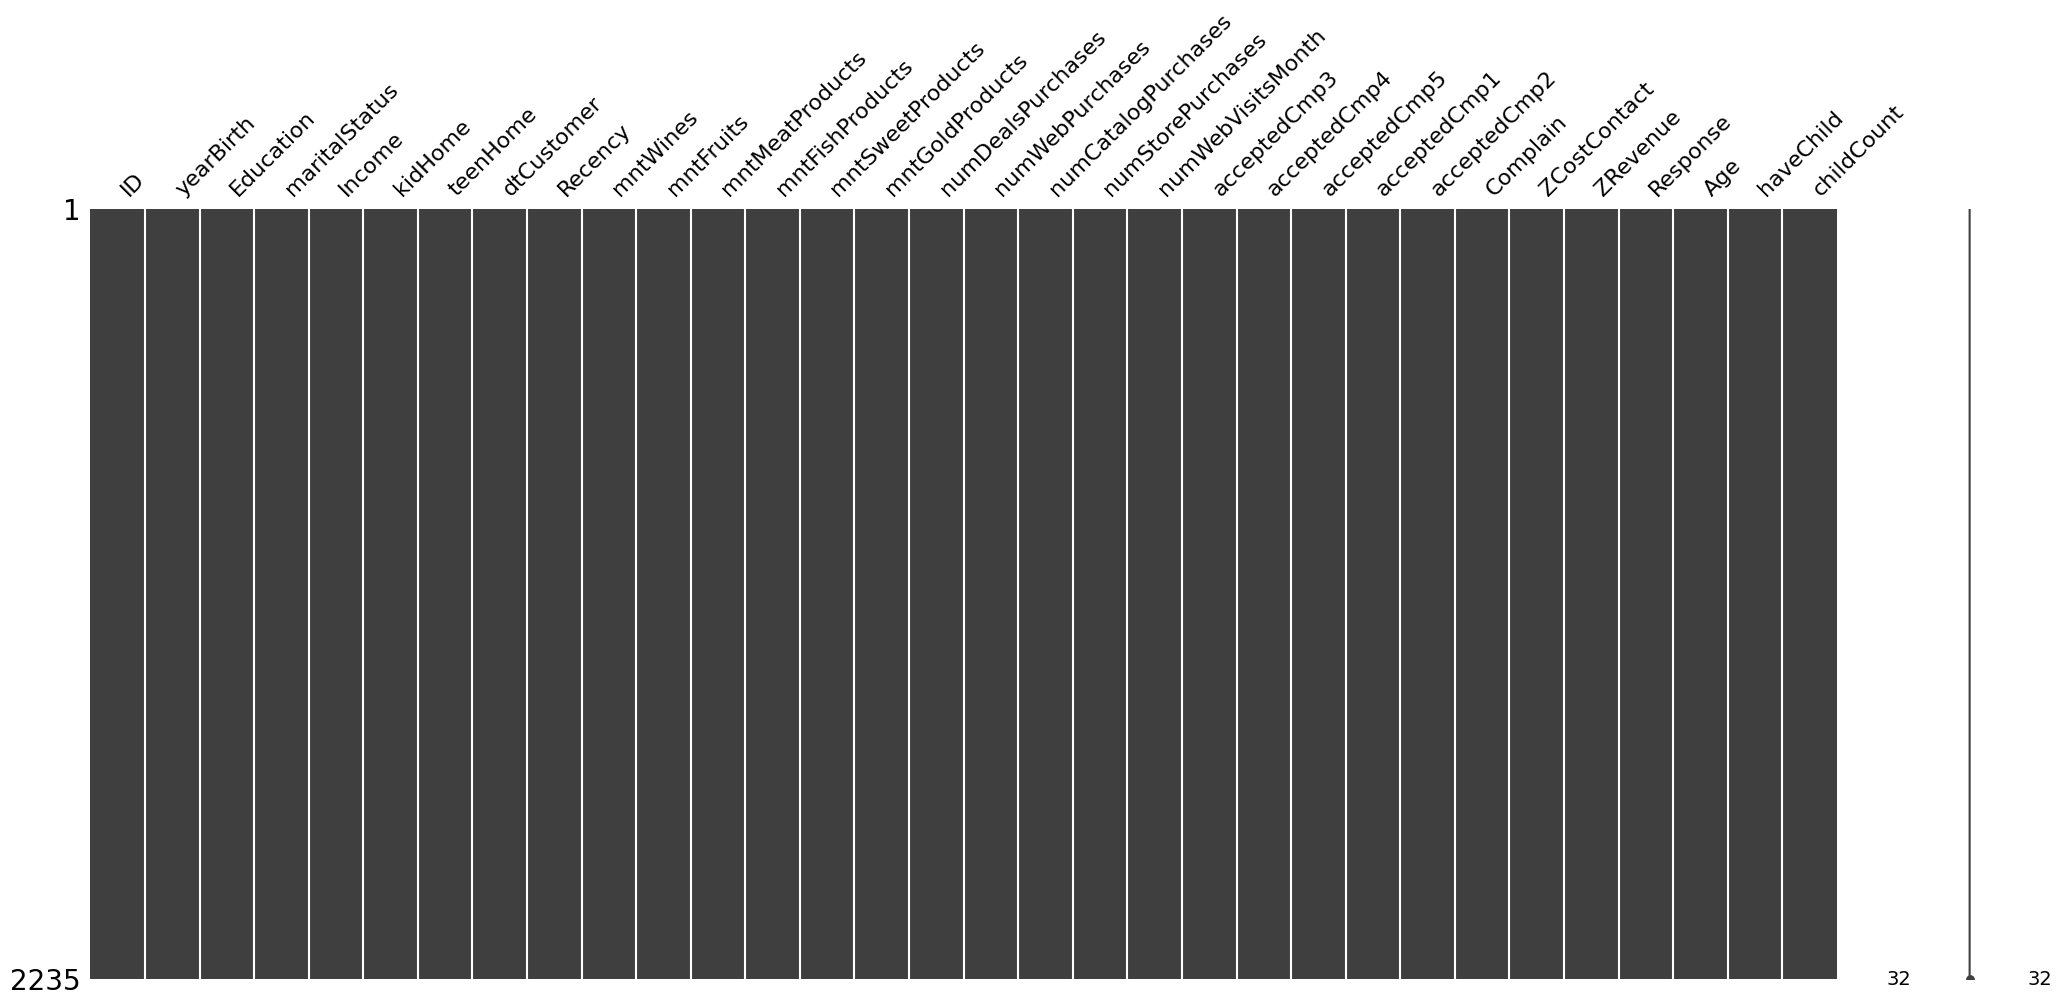

In [29]:
df['Income'] = df['Income'].fillna(df.groupby(['Education', 'maritalStatus'])['Income'].transform('median'))
msno.matrix(df);

Kita akan mengecek kembali dengan mengambil sampel ID yang telah di fillna, apakah benar missing values sudah terisi dengan nilai median dari setiap kategori

In [30]:
df[df['ID'].isin([1994, 5255, 7281, 10629, 8996, 4345])]

,ID,yearBirth,Education,maritalStatus,Income,kidHome,teenHome,dtCustomer,Recency,mntWines,...,acceptedCmp5,acceptedCmp1,acceptedCmp2,Complain,ZCostContact,ZRevenue,Response,Age,haveChild,childCount
10,1994,1983,Graduation,Married,51651.0,1,0,2013-11-15,11,5,...,0,0,0,0,3,11,0,31,Yes,1
27,5255,1986,Graduation,Single,49967.0,1,0,2013-02-20,19,5,...,0,0,0,0,3,11,0,28,Yes,1
43,7281,1959,PhD,Single,49667.0,0,0,2013-11-05,80,81,...,0,0,0,0,3,11,0,55,No,0
71,10629,1973,Master,Married,49611.5,1,0,2012-09-14,25,25,...,0,0,0,0,3,11,0,41,Yes,1
90,8996,1957,PhD,Married,57004.5,2,1,2012-11-19,4,230,...,0,0,0,0,3,11,0,57,Yes,3
1383,4345,1964,Master,Single,49504.0,1,1,2014-01-12,49,5,...,0,0,0,0,3,11,0,50,Yes,2


Lalu kita akan mengecek kembali distribusi dari datanya untuk melihat apakah setelah dilakukan imputasi, terdapat perbedaan yang signifikan pada distribusi data yang dapat menyebabkan bias

In [31]:
df.Income.median()

51287.0

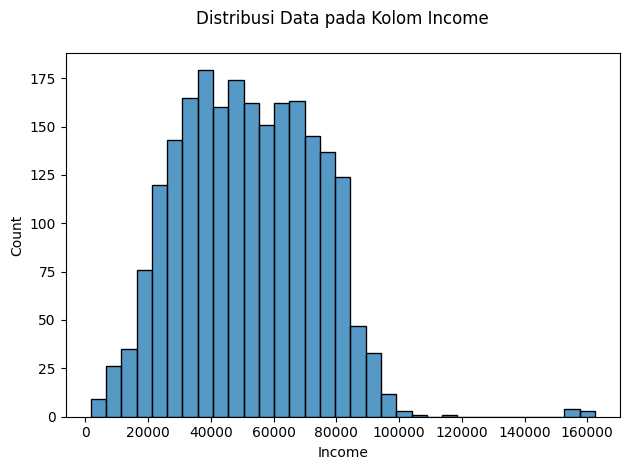

In [32]:
sns.histplot(df, x='Income')
plt.title('Distribusi Data pada Kolom Income\n')
plt.tight_layout();

Dapat dilihat pada visualisasi diatas bahwa hasil dari imputasi tidak merubah distribusi data secara signifikan, dimana sebaran data kurang lebih masih sama dengan sebelum dilakukannya imputasi pada kolom **Income**. 

Baik semua data kosong yang terdapat pada kolom **Income** sudah terisi dengan nilai yang sesuai. Sekarang kita akan mulai handling Duplicate Values

### Handling Duplicate Values
Karena dataset ini merupakan gambaran dari karakteristik pelanggan yang beragam dan memiliki kemungkinan duplicate data di setiap kolomnya tinggi, maka kita hanya akan mengecek duplicate values yang berada di ID saja

In [33]:
df['ID'].duplicated().sum()

0

### Handling Outliers
Untuk dataset ini, saya hanya akan mengecek Outliers dari:
- yearBirth
- Income
- dtCustomer
- recency
- mntWines
- mntFruits
- mntMeatProducts
- mntFishProducts
- mntSweetProducts
- mntGoldProducts
- numDealsPurchases 
- numWebPurchases
- numCatalogPurchases
- numStorePurchases
- numWebVisitsMonth  

Namun karena saya sudah menghandle outlier dari kolom **Income**, jadi saya hanya akan mengecek outliers pada kolom diatas selain kolom **Income**

Jumlah outlier yearBirth(True) : 3(0.1%)
Jumlah outlier Recency(True) : 0(0.0%)
Jumlah outlier mntWines(True) : 35(1.6%)
Jumlah outlier mntFruits(True) : 226(10.1%)
Jumlah outlier mntMeatProducts(True) : 175(7.8%)
Jumlah outlier mntFishProducts(True) : 221(9.9%)
Jumlah outlier mntSweetProducts(True) : 248(11.1%)
Jumlah outlier mntGoldProducts(True) : 205(9.2%)
Jumlah outlier numDealsPurchases(True) : 86(3.8%)
Jumlah outlier numWebPurchases(True) : 4(0.2%)
Jumlah outlier numCatalogPurchases(True) : 23(1.0%)
Jumlah outlier numStorePurchases(True) : 0(0.0%)
Jumlah outlier numWebVisitsMonth(True) : 8(0.4%)


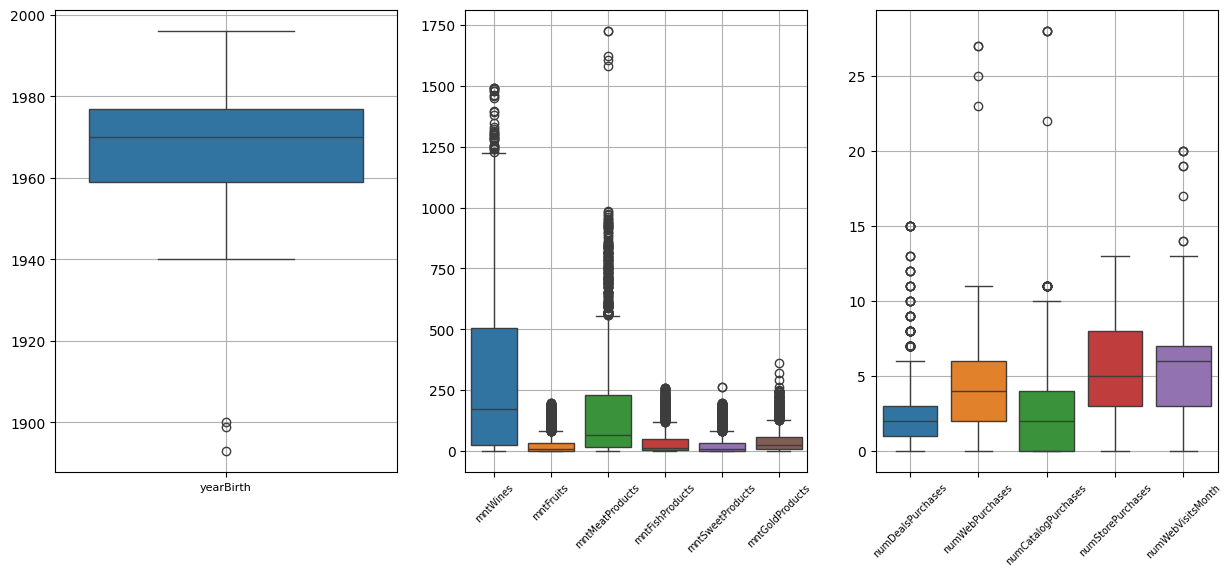

In [34]:
# Mengecek setiap kolom yang disebutkan diatas menggunakan IQR

def checkOutlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

dataChecking = checkOutlier(
                        df[['yearBirth','Recency', 'mntWines', 'mntFruits',
                        'mntMeatProducts', 'mntFishProducts', 'mntSweetProducts',
                        'mntGoldProducts', 'numDealsPurchases', 'numWebPurchases',
                        'numCatalogPurchases', 'numStorePurchases', 'numWebVisitsMonth']]
)
    

dataOutlier = pd.DataFrame(dataChecking[dataChecking.any(axis=1)])

# menambahkan kolom baru untuk menunjukkan apakah suatu kolom memiliki outlier atau tidak

dataOutlier['outlierColumn'] = dataChecking[dataChecking.any(axis=1)].apply(lambda x: ','.join(x.index[x]), axis=1)

# menggunakan looping untuk menunjukkan ada berapa banyak outlier yang ada dalam setiap kolom

for col in dataOutlier.columns:
    if col != 'outlierColumn':
        print(f"Jumlah outlier {col}(True) : {len(dataOutlier[dataOutlier[col] == True])}({len(dataOutlier[dataOutlier[col] == True])/len(df)*100:.1f}%)")


data_presentation = df[['yearBirth','Recency', 'mntWines', 'mntFruits',
                        'mntMeatProducts', 'mntFishProducts', 'mntSweetProducts',
                        'mntGoldProducts', 'numDealsPurchases', 'numWebPurchases',
                        'numCatalogPurchases', 'numStorePurchases', 'numWebVisitsMonth']]

plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
box_plot2 = sns.boxplot(data=data_presentation[['yearBirth']])
box_plot2.set_xticklabels(box_plot2.get_xticklabels(), fontsize=8) 
plt.grid()

plt.subplot(1, 3, 2)
box_plot3 = sns.boxplot(data=data_presentation[['mntWines', 'mntFruits',
                        'mntMeatProducts', 'mntFishProducts', 'mntSweetProducts',
                        'mntGoldProducts']])
box_plot3.set_xticklabels(box_plot3.get_xticklabels(), fontsize=7, rotation=45)
plt.grid()

plt.subplot(1, 3, 3)
box_plot4 = sns.boxplot(data=data_presentation[['numDealsPurchases', 'numWebPurchases',
                        'numCatalogPurchases', 'numStorePurchases', 'numWebVisitsMonth']])
box_plot4.set_xticklabels(box_plot4.get_xticklabels(), fontsize=7, rotation=45)
plt.grid()

plt.show()

#### Handling Outliers dalam kolom **yearBirth**

Dapat dilihat bahwa terdapat outlier pada kolom **yearBirth**, dimana yearBirth pelanggan dibawah 1940. Mari kita lihat terlebih dahulu pada tahun berapakah outliernya. 

In [35]:
yearBirthOutliers = df[df['yearBirth'] < 1940]
yearBirthOutliers

,ID,yearBirth,Education,maritalStatus,Income,kidHome,teenHome,dtCustomer,Recency,mntWines,...,acceptedCmp5,acceptedCmp1,acceptedCmp2,Complain,ZCostContact,ZRevenue,Response,Age,haveChild,childCount
192,7829,1900,Master,Divorced,36640.0,1,0,2013-09-26,99,15,...,0,0,0,1,3,11,0,114,Yes,1
239,11004,1893,Master,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,3,11,0,121,Yes,1
339,1150,1899,PhD,Married,83532.0,0,0,2013-09-26,36,755,...,1,0,0,0,3,11,0,115,No,0


In [36]:
df['dtCustomer'].max()

Timestamp('2014-06-29 00:00:00')

In [37]:
2014 - yearBirthOutliers['yearBirth']

192    114
239    121
339    115
Name: yearBirth, dtype: int32

Dari data yang didapatkan diatas, tahun kelahiran pelanggan dari 1899 - 1900 kurang make sense karena apabila dikurangi dengan tahun dimana data ini terakhir diupdate (2014-06-29). Maka dari itu, kita akan drop data yang memiliki value dari 1899 - 1900 pada kolom **yearBirth**

In [38]:
df = df[df['yearBirth'] > 1940]
df[df['yearBirth'] < 1940]

,ID,yearBirth,Education,maritalStatus,Income,kidHome,teenHome,dtCustomer,Recency,mntWines,...,acceptedCmp5,acceptedCmp1,acceptedCmp2,Complain,ZCostContact,ZRevenue,Response,Age,haveChild,childCount


#### Handling outliers dalam kolom kategori ***mnt***

Dapat dilihat dari visualisasi diatas, kategori **mnt** memiliki banyak data outliers yang perlu untuk dianalisa terlebih dahulu. 

In [39]:
df

,ID,yearBirth,Education,maritalStatus,Income,kidHome,teenHome,dtCustomer,Recency,mntWines,...,acceptedCmp5,acceptedCmp1,acceptedCmp2,Complain,ZCostContact,ZRevenue,Response,Age,haveChild,childCount
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,57,No,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,60,Yes,2
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,49,No,0
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,30,Yes,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,33,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,3,11,0,47,Yes,1
2236,4001,1946,PhD,Married,64014.0,2,1,2014-06-10,56,406,...,0,1,0,0,3,11,0,68,Yes,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,33,No,0
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,58,Yes,1


In [40]:
# Mengecek setiap kolom dalam kategori mnt memiliki outlier atau tidak
def findNonOutlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    nonOutlier = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]
    return nonOutlier

wines = len(findNonOutlier(df, 'mntWines'))
fruits = len(findNonOutlier(df, 'mntFruits'))
meatproducts = len(findNonOutlier(df, 'mntMeatProducts'))
fishproducts = len(findNonOutlier(df, 'mntFishProducts'))
sweetproducts = len(findNonOutlier(df, 'mntSweetProducts'))
goldproducts = len(findNonOutlier(df, 'mntGoldProducts'))

print(f'Jumlah Outliers pada kolom Wines: {len(df) - wines} baris')
print(f'Jumlah Outliers pada kolom Fruits: {len(df) - fruits} baris')
print(f'Jumlah Outliers pada kolom Meats: {len(df) - meatproducts} baris')
print(f'Jumlah Outliers pada kolom Fish: {len(df) - fishproducts} baris')
print(f'Jumlah Outliers pada kolom Sweet: {len(df) - sweetproducts} baris')
print(f'Jumlah Outliers pada kolom Gold: {len(df) - goldproducts} baris')

Jumlah Outliers pada kolom Wines: 35 baris
Jumlah Outliers pada kolom Fruits: 225 baris
Jumlah Outliers pada kolom Meats: 174 baris
Jumlah Outliers pada kolom Fish: 221 baris
Jumlah Outliers pada kolom Sweet: 248 baris
Jumlah Outliers pada kolom Gold: 204 baris


Berdasarkan hasil diatas, terdapat N outliers dari 2235 baris. Kita sekarang akan analisa outlier setiap kategori satu-persatu.

#### mntWines

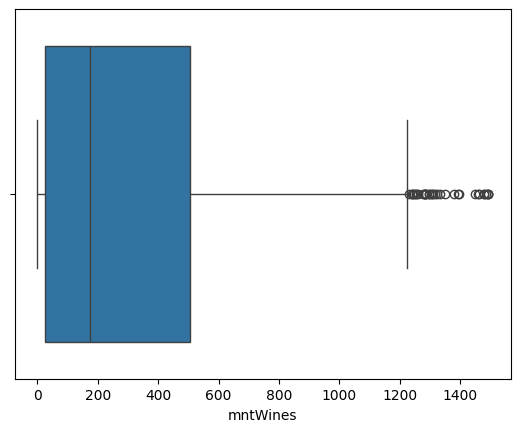

In [41]:
sns.boxplot(df, x='mntWines');

In [42]:
df['mntWines'].describe()

count    2231.000000
mean      304.137158
std       336.930191
min         0.000000
25%        24.000000
50%       173.000000
75%       505.000000
max      1493.000000
Name: mntWines, dtype: float64

In [43]:
df[df['mntWines'] > 1200][['Education', 'maritalStatus', 'Income', 'mntWines']].sort_values(by='mntWines', ascending=False)


,Education,maritalStatus,Income,mntWines
1749,PhD,Married,80360.0,1493
559,Graduation,Married,87771.0,1492
824,Graduation,Married,87771.0,1492
2098,Master,Married,81929.0,1486
543,PhD,Married,84169.0,1478
917,PhD,Married,84169.0,1478
1961,PhD,Divorced,71670.0,1462
1641,PhD,Divorced,64140.0,1459
1488,Graduation,Married,76998.0,1449
497,PhD,Married,78642.0,1396


Outliers pada kolom **mntWines** tidak akan diatasi karena dianggap masih masuk akal. Asumsinya adalah pelanggan yang merupakan outliers dalam kolom ini memiliki preferensi yang kuat dalam membeli produk berkategori Wines, yang didukung oleh data pendapatan **Income**, status pernikahan **maritalStatus**, dan tingkat pendidikan **Education**. Data ini menunjukkan bahwa pelanggan tersebut mampu menghabiskan jumlah total yang mereka belanjakan pada produk berkategori Wines. Keputusan ini juga dipengaruhi oleh preferensi pribadi pelanggan, di mana mereka dapat menginvestasikan uang mereka sesuai dengan keinginan mereka. Selama pendapatan pelanggan tidak melebihi total pengeluaran mereka, maka outliers ini tidak akan ditangani.

#### mntFruits

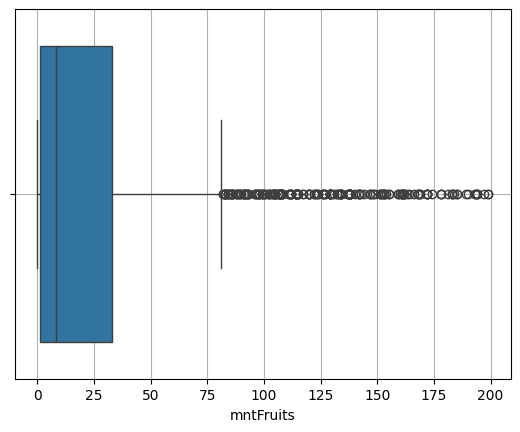

In [44]:
sns.boxplot(df, x='mntFruits')
plt.grid();

In [45]:
df['mntFruits'].describe()

count    2231.000000
mean       26.256387
std        39.716796
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       199.000000
Name: mntFruits, dtype: float64

In [46]:
df[df['mntFruits'] > 75][['Education', 'maritalStatus', 'haveChild', 'childCount', 'Income', 'mntFruits']].sort_values(by='mntFruits', ascending=False).head(50)

,Education,maritalStatus,haveChild,childCount,Income,mntFruits
855,Graduation,Single,Yes,1,60474.0,199
1480,Graduation,Single,Yes,1,60474.0,199
1508,PhD,Married,No,0,78931.0,197
2217,PhD,Divorced,No,0,82032.0,194
109,Master,Married,No,0,89058.0,194
1526,PhD,Divorced,No,0,82032.0,194
1921,Master,Married,Yes,1,70932.0,193
1946,Graduation,Married,No,0,63211.0,193
447,Graduation,Single,No,0,81246.0,190
198,Graduation,Married,No,0,86718.0,189


Outliers pada kolom **mntFruits** tidak akan diatasi karena dianggap masih masuk akal. Asumsinya adalah pelanggan yang merupakan outliers dalam kolom ini memiliki preferensi yang kuat dalam membeli produk berkategori Fruits, yang didukung oleh data pendapatan **Income**, status pernikahan **maritalStatus**, dan keberadaan anak **haveChild**. Data ini menunjukkan bahwa pelanggan tersebut mampu menghabiskan jumlah total yang mereka belanjakan pada produk berkategori Fruits. Keputusan ini juga dipengaruhi oleh preferensi pribadi pelanggan, di mana mereka dapat menginvestasikan uang mereka sesuai dengan keinginan mereka. Selama pendapatan pelanggan tidak melebihi total pengeluaran mereka, maka outliers ini tidak akan ditangani.

#### mntMeatProducts

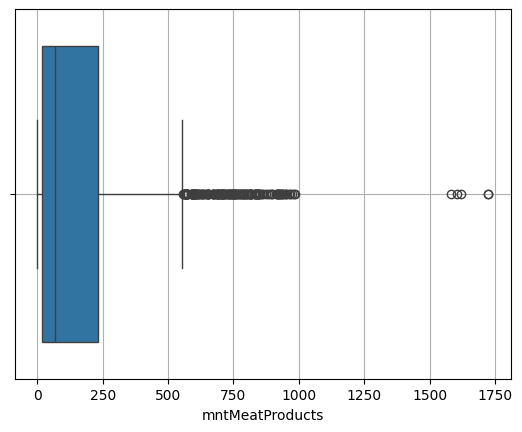

In [47]:
sns.boxplot(df, x='mntMeatProducts')
plt.grid();

In [48]:
df.mntMeatProducts.describe()

count    2231.000000
mean      167.029583
std       225.778093
min         0.000000
25%        16.000000
50%        67.000000
75%       232.000000
max      1725.000000
Name: mntMeatProducts, dtype: float64

In [49]:
df[df['mntMeatProducts'] > 1500][['Education', 'maritalStatus', 'haveChild','childCount', 'Income', 'mntMeatProducts']].sort_values(by='mntMeatProducts', ascending=False).head(20)

,Education,maritalStatus,haveChild,childCount,Income,mntMeatProducts
21,Graduation,Married,Yes,1,2447.0,1725
1653,Graduation,Married,No,0,157146.0,1725
687,PhD,Married,No,0,160803.0,1622
2228,Master,Married,No,0,49611.5,1607
164,PhD,Married,Yes,1,157243.0,1582


Outliers pada kolom **mntMeatProducts** tidak akan ditangani karena masih dianggap masuk akal. Asumsinya adalah pelanggan yang merupakan outliers dalam kolom ini memiliki preferensi yang kuat dalam membeli produk berkategori Meat, yang didukung oleh data pendapatan (**Income**), status pernikahan (**maritalStatus**), dan keberadaan anak (**haveChild**). Data ini menunjukkan bahwa pelanggan tersebut mampu menghabiskan jumlah total yang mereka belanjakan pada produk berkategori Meat. Keputusan ini juga dipengaruhi oleh preferensi pribadi pelanggan, di mana mereka dapat menginvestasikan uang mereka sesuai dengan keinginan mereka. Selama pendapatan pelanggan tidak melebihi total pengeluaran mereka, maka outliers ini tidak akan ditangani.

#### mntFishProducts

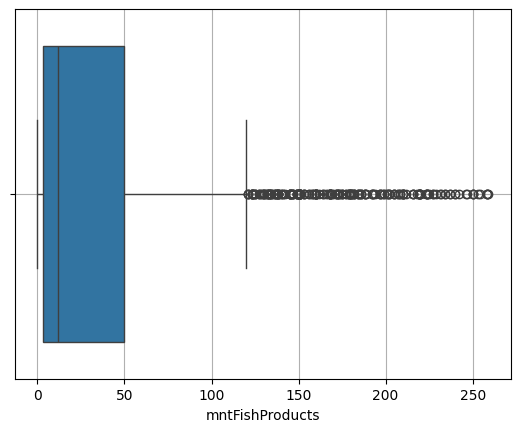

In [50]:
sns.boxplot(df, x='mntFishProducts')
plt.grid();

In [51]:
df['mntFishProducts'].describe()

count    2231.000000
mean       37.432541
std        54.462558
min         0.000000
25%         3.000000
50%        12.000000
75%        50.000000
max       259.000000
Name: mntFishProducts, dtype: float64

In [52]:
df[df['mntFishProducts'] > 125][['Education', 'maritalStatus', 'haveChild','childCount', 'Income', 'mntFishProducts']].sort_values(by='mntFishProducts', ascending=False).head(20)

,Education,maritalStatus,haveChild,childCount,Income,mntFishProducts
1199,Master,Divorced,Yes,1,59184.0,259
1644,Master,Married,Yes,1,75774.0,258
1699,Master,Divorced,Yes,2,73705.0,258
1799,Master,Married,Yes,1,75774.0,258
214,Graduation,Married,No,0,70951.0,254
1601,Master,Married,No,0,90226.0,253
2096,Graduation,Married,No,0,80144.0,250
914,Graduation,Single,No,0,95529.0,250
926,Graduation,Married,No,0,77583.0,250
766,Graduation,Married,No,0,74985.0,247


Outliers pada kolom **mntFishProducts** tidak akan ditangani karena masih dianggap masuk akal. Asumsinya adalah pelanggan yang merupakan outliers dalam kolom ini memiliki preferensi kuat dalam membeli produk berkategori Fish, yang didukung oleh data pendapatan **Income**, status pernikahan **maritalStatus**, dan keberadaan anak **haveChild**. Data ini menunjukkan bahwa pelanggan tersebut mampu menghabiskan jumlah total yang mereka belanjakan pada produk berkategori Fish. Keputusan ini juga dipengaruhi oleh preferensi pribadi pelanggan, di mana mereka dapat menginvestasikan uang mereka sesuai dengan keinginan mereka. Selama pendapatan pelanggan tidak melebihi total pengeluaran mereka, maka outliers ini tidak akan ditangani.

#### mntSweetProducts

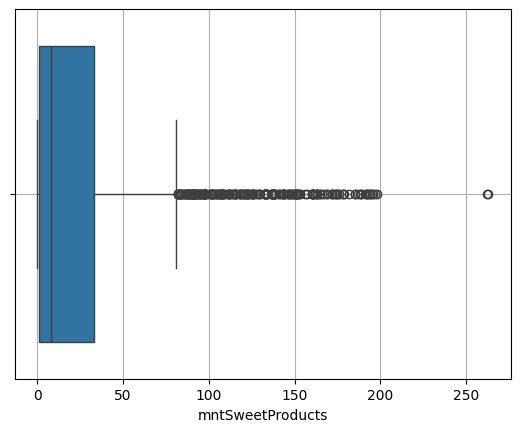

In [53]:
sns.boxplot(df, x='mntSweetProducts')
plt.grid();

In [54]:
df['mntSweetProducts'].describe()

count    2231.000000
mean       27.111161
std        41.325279
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       263.000000
Name: mntSweetProducts, dtype: float64

In [55]:
df[df['mntSweetProducts'] > 75][['Age', 'maritalStatus', 'haveChild','childCount', 'Income', 'mntSweetProducts']].sort_values(by='mntSweetProducts', ascending=False).head(20)

,Age,maritalStatus,haveChild,childCount,Income,mntSweetProducts
27,28,Single,Yes,1,49967.0,263
1898,69,Single,No,0,113734.0,262
634,41,Single,No,0,83917.0,198
1513,28,Married,No,0,79529.0,197
1671,63,Married,No,0,86610.0,196
1253,42,Married,Yes,1,74716.0,195
1484,38,Married,Yes,1,75484.0,194
2012,37,Married,No,0,96876.0,194
456,48,Single,No,0,89572.0,194
470,39,Married,Yes,1,61456.0,192


Outliers pada kolom **mntSweetProducts** tidak akan diatasi karena anggapannya masih masuk akal. Saya berasumsi bahwa pelanggan yang merupakan outliers dalam kolom tersebut memiliki preferensi dan alasan pribadi yang kuat untuk menghabiskan uang mereka pada produk berkategori Sweets. Hal ini didukung oleh data lain seperti **Income**, **maritalStatus**, dan **haveChild**, yang menunjukkan bahwa pelanggan tersebut mampu untuk menghabiskan jumlah total yang mereka belanjakan pada kategori Sweets. Dalam hal ini, keputusan pembelian produk berkategori Sweets lebih didasarkan pada preferensi individual dan alasan pribadi pelanggan, dan selama pendapatan pelanggan masih lebih besar dari jumlah yang mereka habiskan, maka outliers ini tidak akan ditangani.

#### mntGoldProducts

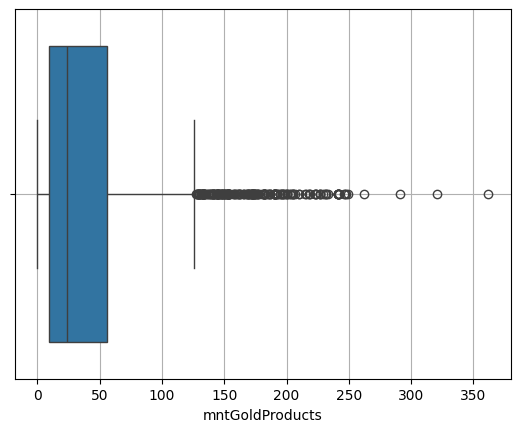

In [56]:
sns.boxplot(df, x='mntGoldProducts')
plt.grid();

In [57]:
df['mntGoldProducts'].describe()

count    2231.000000
mean       43.858359
std        51.878183
min         0.000000
25%         9.000000
50%        24.000000
75%        56.000000
max       362.000000
Name: mntGoldProducts, dtype: float64

In [58]:
df.columns

Index(['ID', 'yearBirth', 'Education', 'maritalStatus', 'Income', 'kidHome',
       'teenHome', 'dtCustomer', 'Recency', 'mntWines', 'mntFruits',
       'mntMeatProducts', 'mntFishProducts', 'mntSweetProducts',
       'mntGoldProducts', 'numDealsPurchases', 'numWebPurchases',
       'numCatalogPurchases', 'numStorePurchases', 'numWebVisitsMonth',
       'acceptedCmp3', 'acceptedCmp4', 'acceptedCmp5', 'acceptedCmp1',
       'acceptedCmp2', 'Complain', 'ZCostContact', 'ZRevenue', 'Response',
       'Age', 'haveChild', 'childCount'],
      dtype='object')

In [59]:
df[df['mntGoldProducts'] > 250][['maritalStatus', 'haveChild', 'Income', 'mntGoldProducts']].sort_values(by='mntGoldProducts', ascending=False).head(20)

,maritalStatus,haveChild,Income,mntGoldProducts
27,Single,Yes,49967.0,362
1975,Married,Yes,4428.0,321
1806,Single,Yes,7144.0,291
1328,Single,No,6560.0,262


Outliers pada kolom **mntGoldProducts** tidak akan diatasi karena anggapannya masih masuk akal. Saya berasumsi bahwa pelanggan yang merupakan outliers dalam kolom tersebut memiliki preferensi dan alasan pribadi yang kuat untuk menghabiskan uang mereka pada produk berkategori Gold. Hal ini didukung oleh data lain seperti **Income**, **maritalStatus**, dan **haveChild**, yang menunjukkan bahwa pelanggan tersebut mampu untuk menghabiskan jumlah total yang mereka belanjakan pada kategori Gold. Dalam hal ini, keputusan pembelian produk berkategori Gold lebih didasarkan pada preferensi individual dan alasan pribadi pelanggan, dan selama pendapatan pelanggan masih lebih besar dari jumlah yang mereka habiskan, maka outliers ini tidak akan ditangani.

#### Handling Outliers dalam kolom kategori **numPurchases** dan kolom **numWebVisitsMonth**

dapat dilihat bahwa pada kolom kategori **numPurchases** dan kolom **numWebVisitsMonth** memiliki outliers tidak sebanyak pada kolom kategori **mnt**. Mari kita cek satu persatu

#### numDealsPurchases

<Axes: xlabel='numDealsPurchases'>

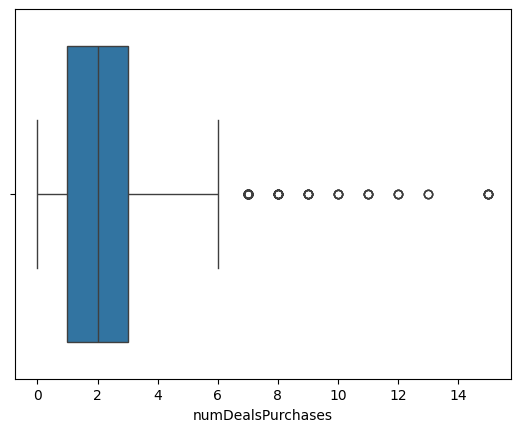

In [60]:
sns.boxplot(df, x='numDealsPurchases')

In [61]:
df['numDealsPurchases'].describe()

count    2231.000000
mean        2.324518
std         1.933079
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: numDealsPurchases, dtype: float64

In [62]:
df[df['numDealsPurchases'] > 6][['Age', 'Education', 'maritalStatus', 'Income', 'haveChild', 'childCount', 'numDealsPurchases']].sort_values(by='numDealsPurchases', ascending=False)

,Age,Education,maritalStatus,Income,haveChild,childCount,numDealsPurchases
21,35,Graduation,Married,2447.0,Yes,1,15
1245,43,Graduation,Divorced,1730.0,No,0,15
687,32,PhD,Married,160803.0,No,0,15
1846,51,PhD,Married,4023.0,Yes,2,15
432,47,Master,Married,67309.0,Yes,2,15
...,...,...,...,...,...,...,...
1109,49,Graduation,Married,66480.0,Yes,2,7
24,63,Graduation,Married,40689.0,Yes,1,7
1309,42,Graduation,Married,59868.0,Yes,1,7
1461,55,Graduation,Married,57957.0,Yes,1,7


In [63]:
df.groupby('maritalStatus')['numDealsPurchases'].count()

maritalStatus
Divorced     308
Married     1442
Single       481
Name: numDealsPurchases, dtype: int64

Outliers pada kolom **numDealsPurchases** tidak akan ditangani karena dianggap masih masuk akal dan dapat memberikan insight berharga dalam analisis data. Asumsinya adalah pelanggan yang merupakan outliers dalam kolom ini memiliki preferensi yang kuat dalam berbelanja produk dengan menggunakan diskon, terutama pelanggan dengan status pernikahan "Married". Kolom ini mencerminkan preferensi pribadi pelanggan dalam membeli produk dengan penawaran diskon. Oleh karena itu, outliers dalam kolom ini dianggap sebagai hasil dari preferensi pelanggan dan tidak perlu ditangani.

#### numWebPurchases

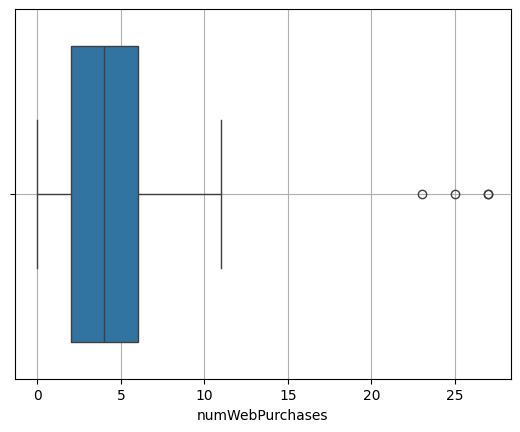

In [64]:
sns.boxplot(df, x='numWebPurchases')
plt.grid();

In [65]:
df['numWebPurchases'].describe()

count    2231.000000
mean        4.086060
std         2.781544
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: numWebPurchases, dtype: float64

In [66]:
df[df['numWebPurchases'] > 15][['ID','Education', 'Age', 'maritalStatus', 'numWebVisitsMonth', 'numWebPurchases']].sort_values(by='numWebPurchases', ascending=False).head()

,ID,Education,Age,maritalStatus,numWebVisitsMonth,numWebPurchases
27,5255,Graduation,28,Single,1,27
1898,4619,PhD,69,Single,1,27
1975,10311,Graduation,45,Married,1,25
1806,6237,PhD,48,Single,0,23


Outliers pada kolom **numWebPurchases** tidak akan ditangani karena dianggap masih masuk akal dan dapat memberikan insight berharga dalam analisis data. Asumsinya adalah pelanggan yang merupakan outliers dalam kolom ini memiliki preferensi yang kuat dalam berbelanja produk melalui situs web supermarket X, seperti yang tercermin dalam kolom **numWebVisitsMonth** yang berkaitan. Kolom ini mencerminkan preferensi pribadi pelanggan dalam berbelanja secara online melalui situs web supermarket X. Oleh karena itu, outliers dalam kolom ini dianggap sebagai hasil dari preferensi pelanggan dan tidak perlu ditangani.

#### numCatalogPurchases

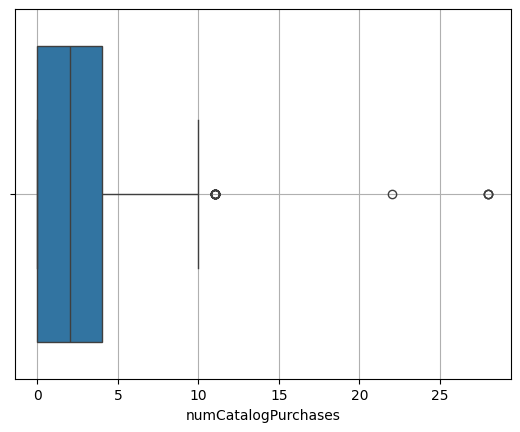

In [67]:
sns.boxplot(df, x='numCatalogPurchases')
plt.grid();

In [68]:
df['numCatalogPurchases'].describe()

count    2231.000000
mean        2.661139
std         2.921992
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: numCatalogPurchases, dtype: float64

In [69]:
df[df['numCatalogPurchases'] > 10][['Education', 'Age', 'maritalStatus', 'numCatalogPurchases']].sort_values(by='numCatalogPurchases', ascending=False).head()

,Education,Age,maritalStatus,numCatalogPurchases
21,Graduation,35,Married,28
1653,Graduation,37,Married,28
687,PhD,32,Married,28
164,PhD,41,Married,22
1212,Graduation,42,Married,11


Outliers pada kolom **numCatalogPurchases** tidak akan ditangani karena dianggap masih masuk akal dan dapat memberikan insight berharga dalam analisis data. Asumsinya adalah pelanggan yang merupakan outliers dalam kolom ini memiliki preferensi yang kuat dalam berbelanja produk melalui katalog supermarket X. Kolom ini mencerminkan preferensi pribadi pelanggan dalam berbelanja melalui katalog. Oleh karena itu, outliers dalam kolom ini dianggap sebagai hasil dari preferensi pelanggan dan tidak perlu ditangani.

#### numStorePurchases
Untuk kolom ini akan dilewati karena tidak terdapat outliers

#### numWebVisitsMonth

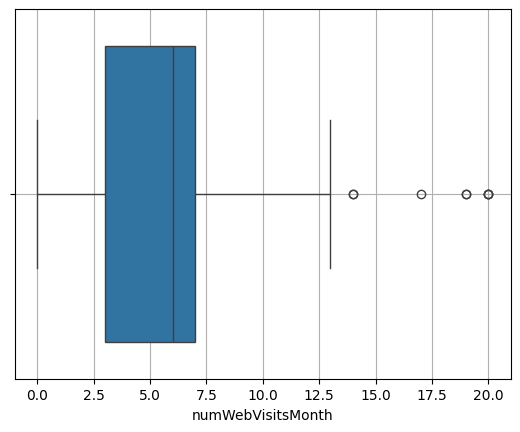

In [70]:
sns.boxplot(df, x='numWebVisitsMonth')
plt.grid();

In [71]:
df['numWebVisitsMonth'].describe()

count    2231.000000
mean        5.320036
std         2.425527
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: numWebVisitsMonth, dtype: float64

In [72]:
df[df['numWebVisitsMonth'] > 13][['Age', 'Education', 'maritalStatus', 'numWebVisitsMonth', 'numWebPurchases']]

,Age,Education,maritalStatus,numWebVisitsMonth,numWebPurchases
9,64,PhD,Married,20,1
774,57,PhD,Married,20,0
981,49,Graduation,Divorced,14,0
1042,23,Graduation,Single,19,0
1245,43,Graduation,Divorced,20,0
1328,32,Master,Single,17,1
1524,41,Graduation,Single,14,0
1846,51,PhD,Married,19,0


Outliers pada kolom **numWebVisitsMonth** tidak akan ditangani karena dianggap masih masuk akal dan dapat memberikan wawasan berharga dalam analisis data. Asumsinya adalah pelanggan yang merupakan outliers dalam kolom ini memiliki preferensi yang kuat dalam melihat produk melalui situs web, tapi tidak untuk membeli barang di supermarket X, seperti yang tercermin dalam kolom **numWebPurchases** yang berkaitan. Hal ini menunjukkan bahwa pelanggan ini lebih suka melihat barang yang ingin dibeli secara online namun tidak membeli, melalui situs web supermarket X. Oleh karena itu, outliers dalam kolom ini dianggap sebagai preferensi pribadi pelanggan dan tidak perlu ditangani.

Karena sudah tidak ada data yang NaN, duplicate dan outliers yang perlu ditangani, sekarang data sudah dapat digunakan untuk analisis

In [73]:
df.to_csv('Supermarket_Customers_Cleaned.csv')

## Analisis Data

### Customer Membership Growth Overtime <a id="growth">

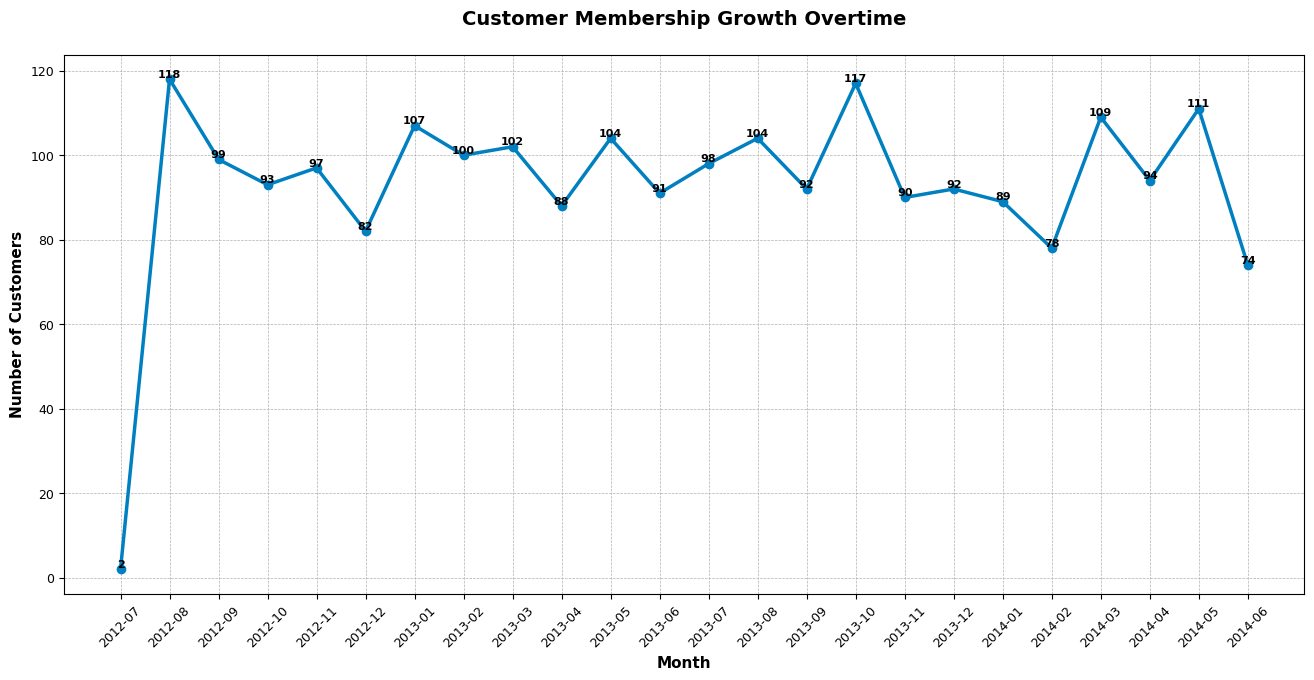

In [74]:
customerCount = df.groupby(df['dtCustomer'].dt.to_period('M')).size()
customerCount.index = customerCount.index.astype(str)

plt.figure(figsize=(16, 7))
plt.plot(customerCount.index, customerCount.values, marker='o', color='#0080C0', linewidth=2.5)
plt.xlabel('Month', fontsize=11, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=11, fontweight='bold')
plt.title('Customer Membership Growth Overtime\n', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='both', linestyle='--', linewidth=0.5)

for i in range(len(customerCount)):
    plt.text(customerCount.index[i], customerCount.values[i], str(customerCount.values[i]), ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.show()

Dari visualisasi di atas, kita dapat mengamati variasi dalam pertumbuhan pelanggan yang mendaftar sebagai member di supermarket X setiap bulannya. Agustus 2012 adalah bulan dengan pertumbuhan tertinggi sejak program keanggotaan supermarket X diluncurkan, dengan pendaftaran 118 pelanggan. Kemudian, Oktober 2013 dan Mei 2014 juga mencatat pertumbuhan yang signifikan, dengan masing-masing 117 dan 112 pelanggan yang mendaftar.

Namun, ada beberapa bulan yang menunjukkan penurunan dalam pendaftaran member. Sebagai contoh, Desember 2012 mengalami penurunan dari 97 pelanggan menjadi hanya 82 pelanggan, meskipun bulan ini seharusnya merupakan periode tinggi (High Season) di mana pelanggan biasanya berbelanja lebih banyak. Tren serupa terlihat di Desember tahun berikutnya, di mana penurunan pelanggan mendaftar menjadi member hanya bertambah 2 pelanggan. Selain itu, Juni 2014 mencatat penurunan signifikan, dengan jumlah pendaftaran turun dari 112 pelanggan menjadi 74 pelanggan.

Penurunan seperti ini menjadi perhatian, terutama mengingat sejarah pertumbuhan program keanggotaan. Hal ini memunculkan pertanyaan mengenai penyebab penurunan dan perlu adanya identifikasi masalah serta segmentasi pasar yang tepat untuk mencegah penurunan ini di masa depan.

### Segmentation for Last Campaign by Education Background, Customer Recency, Marital Status, Age Group, Income Group and Having Child

Berdasarkan data dari U.S. Department of Health and Services tahun 2014, ambang batas pendapatan rendah berkisar antara $11,670 hingga $40,090 per tahun. Dengan asumsi bahwa data Income per tahun di U.S berdistribusi normal, maka kita akan mengambil nilai rata-rata dari kisaran income tersebut dan menggunakannya sebagai pembatas antara low income dan high income <br>
Sumber: (https://aspe.hhs.gov/2014-poverty-guidelines)

In [75]:
# Mengecek apakah distribusi data tersebut normal atau tidak. Apabila normal akan menggunakan mean. Apabila tidak normal maka akan menggunakan median

lowIncomeThreshold = [11670, 15730, 19790, 23850, 27910, 31970, 36030, 40090]
kstest('norm', lowIncomeThreshold)

KstestResult(statistic=1.0, pvalue=6.434789043484698e-07, statistic_location=2.070643429433815, statistic_sign=1)

In [76]:
medianLowIncome = np.median(lowIncomeThreshold)
print(medianLowIncome)

25880.0


<a id="segmentation"></a>
Segmentasi Pelanggan berdasarkan Campaign Terakhir (Kolom **Response**) 

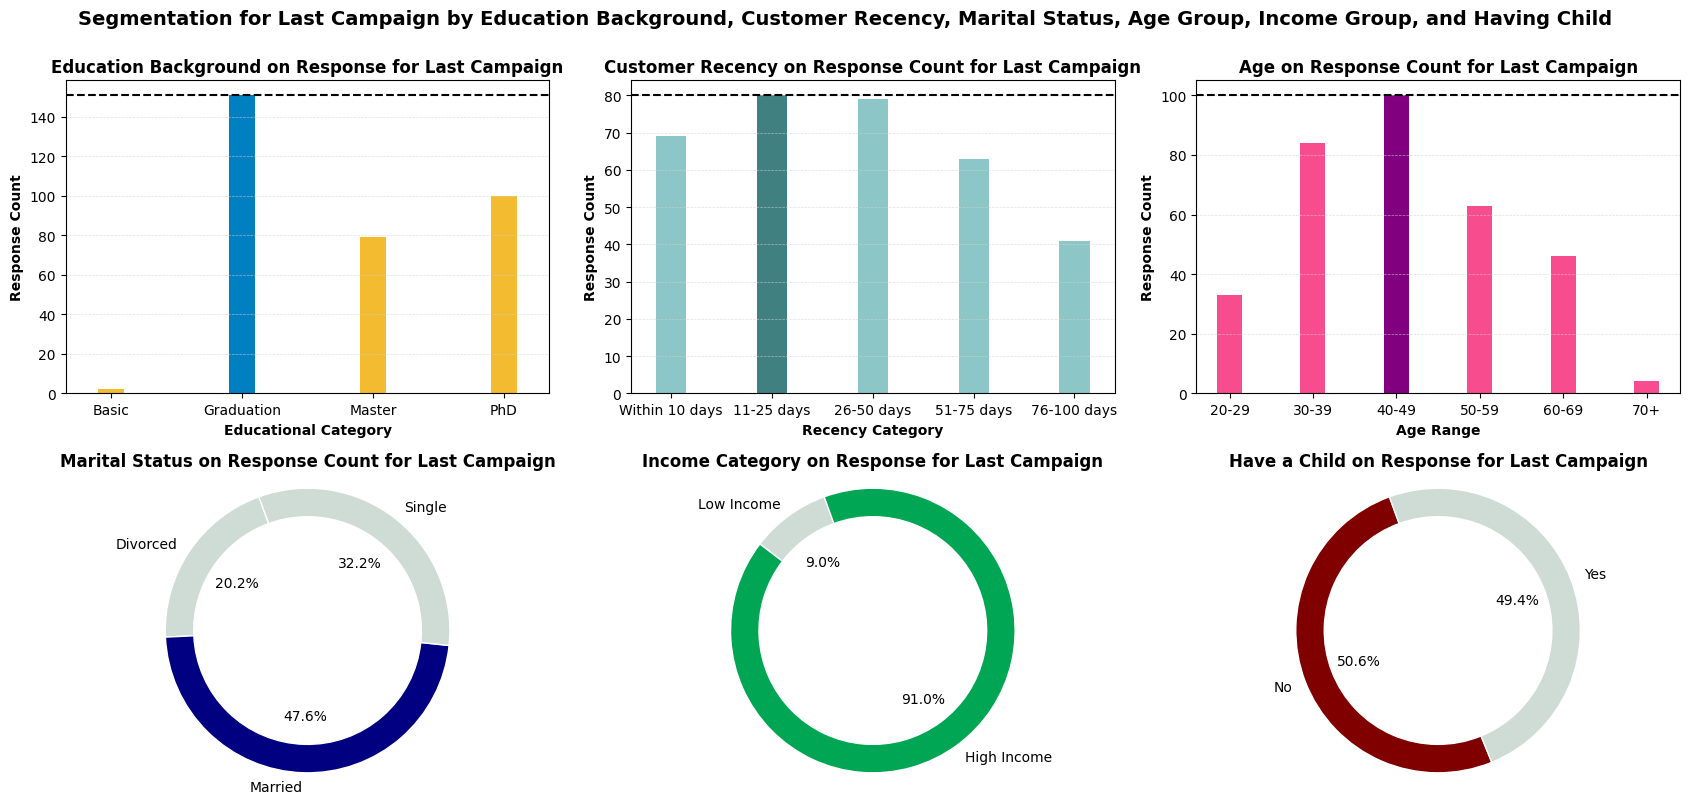

In [77]:
df['incomeCategory'] = pd.cut(df['Income'], bins=[0, medianLowIncome, float('inf')], labels=['Low Income', 'High Income']) 

ageBins = [20, 30, 40, 50, 60, 70, 100]
ageLabels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['ageGroup'] = pd.cut(df['Age'], bins=ageBins, labels=ageLabels, right=False)

recencyBins = [0, 10, 25, 50, 75, 100]
recencyLabels = ['Within 10 days', '11-25 days', '26-50 days', '51-75 days', '76-100 days']
df['recencyCategory'] = pd.cut(df['Recency'], bins=recencyBins, labels=recencyLabels, right=False)

eduLastCampaign = df[df['Response'] == 1].groupby('Education').size()
recencyLastCampaign = df[df['Response'] == 1].groupby('recencyCategory').size()
incomeLastCampaign = df[df['Response'] == 1].groupby('incomeCategory').size()
ageLastCampaign = df[df['Response'] == 1].groupby('ageGroup').size()
childLastCampaign = df[df['Response'] == 1].groupby('haveChild').size()
maritalStatusLastCampaign = df[df['Response'] == 1].groupby('maritalStatus').size()

fig = plt.figure(figsize=(17, 8))

eduMaxValue = eduLastCampaign.max()
plt.subplot(2, 3, 1)
eduLastCampaign.plot(kind='bar', color=['#0080C0' if x == eduMaxValue else '#F2BB30' for x in eduLastCampaign], width=0.2)
plt.xlabel('Educational Category', fontweight='bold')
plt.ylabel('Response Count', fontweight='bold')
plt.title('Education Background on Response for Last Campaign', fontweight='bold')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='lightgray', alpha=0.7)
plt.xticks(range(len(eduLastCampaign)), eduLastCampaign.index, rotation=0, ha='center')
plt.axhline(eduMaxValue, color='black', linestyle='--')

recencyMaxValue = recencyLastCampaign.max()
plt.subplot(2, 3, 2)
recencyLastCampaign.plot(kind='bar', color=['#408080' if x == recencyMaxValue else '#8CC6C6' for x in recencyLastCampaign], width=0.3)
plt.xlabel('Recency Category', fontweight='bold')
plt.ylabel('Response Count', fontweight='bold')
plt.title('Customer Recency on Response Count for Last Campaign', fontweight='bold')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='lightgray', alpha=0.7)
plt.xticks(range(len(recencyLastCampaign)), recencyLastCampaign.index, rotation=0, ha='center')
plt.axhline(recencyMaxValue, color='black', linestyle='--')

ageMaxValue = ageLastCampaign.max()
plt.subplot(2, 3, 3)
ageLastCampaign.plot(kind='bar', color=['#800080' if x == ageMaxValue else '#F74C8D' for x in ageLastCampaign], width=0.3)
plt.xlabel('Age Range', fontweight='bold')
plt.ylabel('Response Count', fontweight='bold')
plt.title('Age on Response Count for Last Campaign', fontweight='bold')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='lightgray', alpha=0.7)
plt.xticks(range(len(ageLastCampaign)), ageLastCampaign.index, rotation=0, ha='center')
plt.axhline(ageMaxValue, color='black', linestyle='--')

maritalMaxValue = maritalStatusLastCampaign.max()
plt.subplot(2, 3, 4)
wedgeprops = {'width': 0.2, 'edgecolor': 'white'}
maritalStatusLastCampaign.plot(kind='pie', colors=['#000080' if x == maritalMaxValue else '#cfdbd5' for x in maritalStatusLastCampaign], 
                               autopct='%1.1f%%', startangle=110, wedgeprops=wedgeprops)
plt.xlabel('')
plt.ylabel('')
plt.title('Marital Status on Response Count for Last Campaign', fontsize=12, fontweight='bold')
plt.axis('equal')

incomeMaxValue = incomeLastCampaign.max()
plt.subplot(2, 3, 5)
wedgeprops = {'width': 0.2, 'edgecolor': 'white'}
incomeLastCampaign.plot(kind='pie', colors=['#00A653' if x == incomeMaxValue else '#cfdbd5' for x in incomeLastCampaign], 
                        autopct='%1.1f%%', startangle=110, wedgeprops=wedgeprops)
plt.xlabel('')
plt.ylabel('')
plt.title('Income Category on Response for Last Campaign', fontsize=12, fontweight='bold')
plt.axis('equal')

plt.subplot(2, 3, 6)
wedgeprops = {'width': 0.2, 'edgecolor': 'white'}
childLastCampaign.plot(kind='pie', colors=['#800000' if x == 'No' else '#cfdbd5' for x in childLastCampaign.index], 
                       autopct='%1.1f%%', startangle=110, wedgeprops=wedgeprops)
plt.xlabel('')
plt.ylabel('')
plt.title('Have a Child on Response for Last Campaign', fontsize=12, fontweight='bold')
plt.axis('equal')

plt.suptitle('Segmentation for Last Campaign by Education Background, Customer Recency, Marital Status, Age Group, Income Group, and Having Child', fontsize=14, y=1, fontweight='bold')
plt.tight_layout()

plt.show()


<a id="segmentation"></a>
Dari visualisasi yang sudah dibuat, berikut adalah insight yang dapat diambil:

1. **Educational Background on Response for Last Campaign (Grafik ke-1):** Dapat dilihat bahwa sebagian besar responden dengan latar belakang pendidikan "Graduation,"memberikan respons tertinggi dalam kampanye terakhir. Sedangkan responden dengan latar belakang "Basic" memberikan respons terendah.

2. **Customer Recency on Response Count for Last Campaign (Grafik ke-2):** Grafik ini menunjukkan bahwa sebagian besar responden termasuk dalam kategori "Rarely" dan "Quite Often" dalam hal recency. Kategori "Rarely" memiliki respons tertinggi, sedangkan "Very Often" memiliki respons terendah.

3. **Age on Response Count for Last Campaign (Grafik ke-3):** Dapat dilihat bahwa kelompok usia "40-49" memberikan respons tertinggi dalam kampanye terakhir. Selain itu, kelompok usia "70+" memberikan respons terendah.

4. **Marital Status on Response Count for Last Campaign (Grafik ke-4):** Grafik ini menunjukkan bahwa sebagian besar responden yang memiliki marital status "Married," memberikan respons tertinggi. Sementara itu, responden dengan status "Single" memberikan respons terendah.

5. **Income Category on Response for Last Campaign (Grafik ke-5):** Terlihat bahwa sebagian besar responden yang termasuk kategori "High Income," memberikan respons tertinggi. Kategori "Low Income" memiliki respons yang lebih rendah.

6. **Have a Child on Response for Last Campaign (Grafik ke-6):** Grafik ini menunjukkan bahwa mayoritas responden yang tidak memiliki anak, memberikan respons tertinggi. Responden yang memiliki anak memberikan respons yang lebih rendah.

Dari visualisasi ini, kita dapat menyimpulkan bahwa latar belakang pendidikan, recency, usia, status perkawinan, kategori pendapatan, dan memiliki anak memiliki pengaruh pada respons kampanye terakhir. Dengan informasi ini, perusahaan dapat mengarahkan upaya kampanye mereka lebih efektif dengan menargetkan kelompok yang lebih mungkin memberikan respons positif.

Dari visualisasi diatas, dapat dilihat bahwa segmen yang merespon terbanyak pada campaign terakhir adalah dengan **Background Pendidikan** "Graduation", **Recency Pelanggan** "Rarely", **Age Group** "40-49", **Status Pernikahan** "Married", **Kategori Pendapatan** "Low Income", dan **Tidak Memiliki Anak**. Setelah ini, saya akan melakukan analisis untuk mengkonfirmasi apakah segmen pelanggan ini dapat dianggap sebagai representasi yang valid jika diterapkan pada seluruh anggota pelanggan. Selain itu, saya akan mengevaluasi apakah segmen ini menunjukkan kecenderungan dalam pola belanja mereka, termasuk sejauh mana frekuensi dan jumlah transaksi di supermarket.

### 1. Identifikasi Segmen Pelanggan yang Berbeda Berdasarkan Total Pembelian Produk

#### - Apakah terdapat hubungan antara Recency Customer dengan Minat Belanja?

Text(0, 0.5, 'Customer Count')

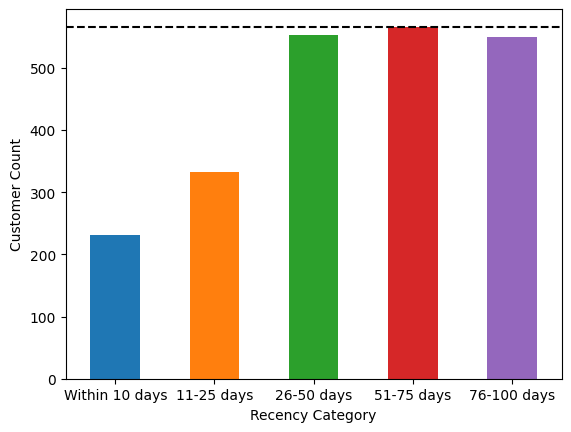

In [78]:
custRec = df.groupby('recencyCategory')[['ID']].count().reset_index()
maxCust = custRec['ID'].max()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
custRec.plot(kind='bar', x='recencyCategory', y='ID', legend=False, color=colors)
plt.axhline(maxCust, color='black', linestyle='--')
plt.xticks(rotation=0);
plt.xlabel('Recency Category')
plt.ylabel('Customer Count')

Tabel dan visualisasi yang diberikan menggambarkan data pelanggan dari supermarket X berdasarkan kategori recency, yang mengukur jumlah hari sejak pembelian terakhir pelanggan. Data ini memberikan pemahaman yang lebih mendalam tentang pola pembelian pelanggan serta memberikan insight yang berharga bagi supermarket dalam mengelola hubungan dengan pelanggan dan merencanakan strategi pemasaran yang lebih efektif.

**Pembagian Pelanggan Berdasarkan Kategori Recency:**
Tabel menunjukkan pembagian pelanggan ke dalam lima kategori recency yang berbeda:
1. **Within 10 days (Dalam 10 hari)**: Terdiri dari 231 pelanggan.
2. **11-25 days (11-25 hari)**: Terdiri dari 333 pelanggan.
3. **26-50 days (26-50 hari)**: Terdiri dari 554 pelanggan.
4. **51-75 days (51-75 hari)**: Terdiri dari 566 pelanggan.
5. **76-100 days (76-100 hari)**: Terdiri dari 551 pelanggan.

**Insight dari Data:**
1. **Pelanggan Terbanyak:** Kategori "51-75 days" memiliki jumlah pelanggan terbanyak dengan 566 pelanggan. Hal ini menunjukkan bahwa sebagian besar pelanggan melakukan pembelian dalam rentang waktu 51-75 hari setelah pembelian sebelumnya. Ini bisa diartikan bahwa pelanggan cenderung melakukan pembelian secara berkala dan tidak terlalu sering.

2. **Rentang Waktu Pembelian yang Populer:** Kategori "26-50 days" juga memiliki jumlah pelanggan yang signifikan, yaitu 554 pelanggan. Ini mengindikasikan bahwa banyak pelanggan cenderung melakukan pembelian dalam rentang waktu 26-50 hari setelah pembelian sebelumnya. Hal ini bisa menjadi fokus bagi strategi pemasaran untuk menarik pelanggan dalam jangka waktu tersebut.

3. **Pelanggan yang Sering Berbelanja:** Kategori "Within 10 days" memiliki 231 pelanggan, yang menunjukkan bahwa ada sejumlah pelanggan yang sering melakukan pembelian dalam waktu singkat setelah pembelian sebelumnya. Ini bisa menjadi peluang bagi toko untuk meningkatkan penjualan dengan menargetkan pelanggan yang cenderung berbelanja lebih sering.

4. **Rentang Waktu Pembelian yang Kurang Populer:** Kategori "76-100 days" dan "11-25 days" memiliki jumlah pelanggan yang hampir sama, masing-masing 551 dan 333 pelanggan. Ini menunjukkan bahwa sebagian pelanggan lainnya cenderung melakukan pembelian dalam rentang waktu yang lebih panjang. Ini dapat menjadi area yang perlu diperhatikan untuk meningkatkan retensi pelanggan.

5. **Garis Putus-putus:** Garis putus-putus hitam yang digambarkan pada grafik menunjukkan jumlah pelanggan terbanyak dari seluruh kategori recency. Kategori "51-75 days" adalah yang tertinggi dalam jumlah pelanggan, sementara kategori lainnya berada di bawahnya.

Dari data ini, supermarket dapat merencanakan strategi pemasaran yang lebih terfokus untuk setiap kategori recency. Misalnya, mereka dapat mengirimkan penawaran khusus kepada pelanggan dalam kategori "Within 10 days" untuk mendorong pembelian lebih lanjut, atau mereka dapat membuat program loyalitas khusus bagi pelanggan dalam kategori "51-75 days" untuk menjaga retensi pelanggan yang tinggi. Kesimpulannya, data ini memberikan wawasan berharga tentang perilaku pembelian pelanggan dan dapat membantu dalam pengambilan keputusan strategis lebih lanjut.

#### - Apakah pendapatan dapat mempengaruhi pola belanja pelanggan supermarket?

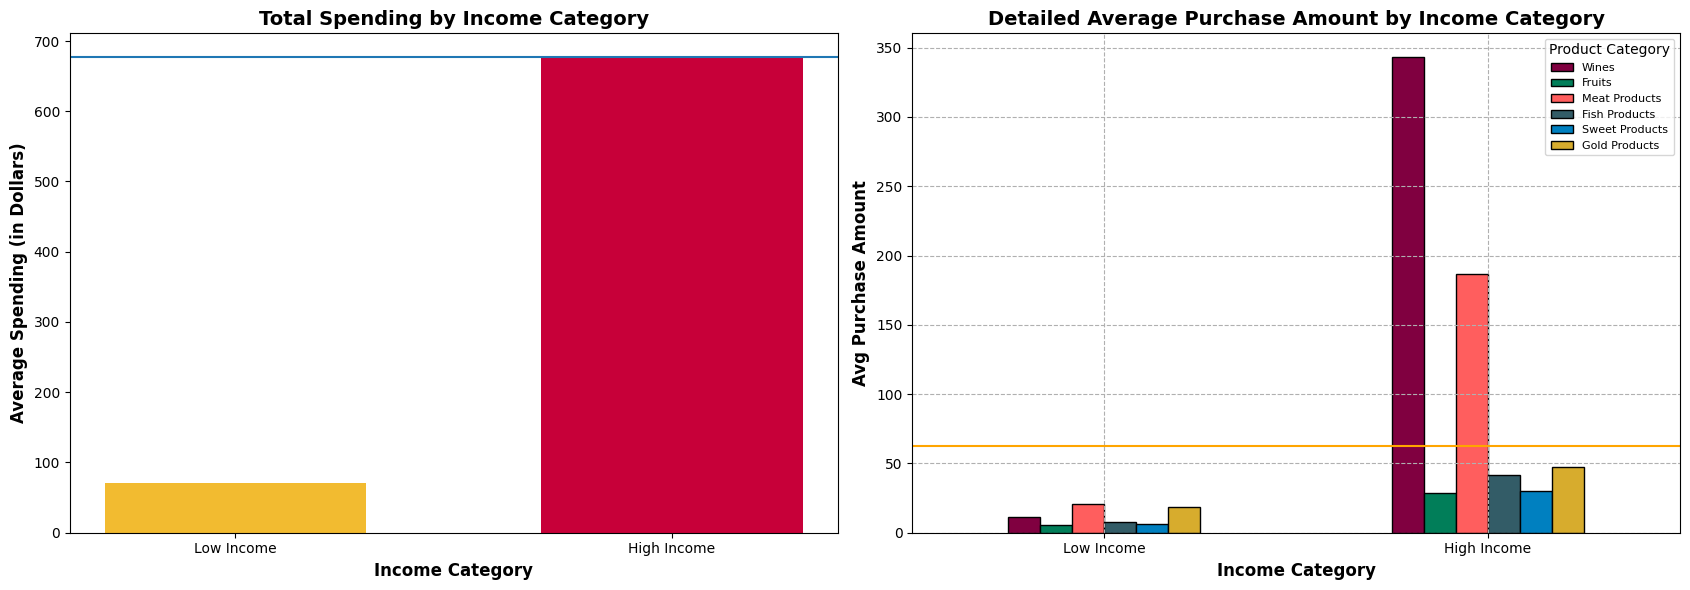

In [79]:
incomeCategoryAvgSpend = df.groupby('incomeCategory')[['mntWines', 'mntFruits', 'mntMeatProducts', 'mntFishProducts', 'mntSweetProducts', 'mntGoldProducts']].mean().reset_index()
incomeCategoryAvgSpend['totalSpend'] = incomeCategoryAvgSpend[['mntWines', 'mntFruits', 'mntMeatProducts', 'mntFishProducts', 'mntSweetProducts', 'mntGoldProducts']].sum(axis=1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 14))

colors = ['#F2BB30', '#C70039']
axes[0].bar(incomeCategoryAvgSpend['incomeCategory'], incomeCategoryAvgSpend['totalSpend'], color=colors, width=0.6)
axes[0].set_title('Total Spending by Income Category', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Income Category', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Average Spending (in Dollars)', fontsize=12, fontweight='bold')
axes[0].axhline(incomeCategoryAvgSpend['totalSpend'].max())

incomeCategorySpendperCat = df.groupby('incomeCategory')[['mntWines', 'mntFruits', 'mntMeatProducts', 'mntFishProducts', 'mntSweetProducts', 'mntGoldProducts']].mean()
legend_labels = ['Wines', 'Fruits', 'Meat Products', 'Fish Products', 'Sweet Products', 'Gold Products']
colors = ['#800040', '#017E59', '#FF5E5E', '#335c67', '#0080C0', '#D7AC2D']

incomeCategorySpendperCat.plot(kind='bar', ax=axes[1], width=0.5, color=colors, position=0.5, edgecolor='black')
axes[1].figure.set_size_inches(17, 6)
axes[1].set_xlabel('Income Category', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Avg Purchase Amount', fontsize=12, fontweight='bold')
axes[1].set_title('Detailed Average Purchase Amount by Income Category', fontsize=14, fontweight='bold')
axes[1].legend(labels=legend_labels, title='Product Category', fontsize=8, loc='upper right')
axes[1].tick_params(axis='x', labelrotation=0, labelsize=10)
axes[1].axhline(incomeCategorySpendperCat.values.mean(), color='orange')


plt.tight_layout()
plt.grid(linestyle='--', label='Avg Purchase')
plt.show()


Dari visualisasi di atas, terlihat perbedaan yang signifikan dalam pola pembelian antara pelanggan dengan pendapatan tinggi dan rendah. Pelanggan dengan **High Income** cenderung membeli dalam jumlah besar, baik untuk produk berharga tinggi maupun produk lainnya. Bahkan, beberapa di antaranya bahkan melebihi rata-rata pembelian keseluruhan. Di sisi lain, sebagian pelanggan dengan **Low Income** juga terlihat aktif dalam berbelanja, meskipun jumlah pembelian mereka tidak sebanyak pelanggan berpendapatan tinggi.

Disamping itu, terlihat bahwa pelanggan yang terkategorikan sebagai **Pendapatan Tinggi** lebih cenderung memprioritaskan pengeluaran mereka untuk membeli anggur dan daging. Di sisi lain, pelanggan dengan kategori **Pendapatan Rendah** lebih memilih untuk mengalokasikan pengeluaran mereka pada pembelian daging dan emas. Perlu diperhatikan bahwa pelanggan dalam kategori **Pendapatan Rendah** tampak memiliki kecenderungan untuk membeli emas dalam jumlah yang signifikan. Hal ini mungkin disebabkan oleh persepsi umum bahwa emas merupakan investasi yang stabil dan aman. Atau mungkin juga karena pelanggan dengan **Pendapatan Rendah** memiliki keterbatasan dalam akses ke instrumen investasi lain yang lebih kompleks atau berisiko, seperti saham atau obligasi.

Oleh karena itu, kesimpulannya adalah bahwa pelanggan dengan pendapatan tinggi mendominasi dalam hal pembelian, baik untuk produk berharga tinggi maupun produk lainnya. Hal ini menunjukkan bahwa kategori pendapatan tinggi dapat menjadi faktor relevan dalam segmentasi pasar.

#### - Apakah terdapat perbedaan antar Background Pendidikan dengan preferensi dan minat berbelanja? 

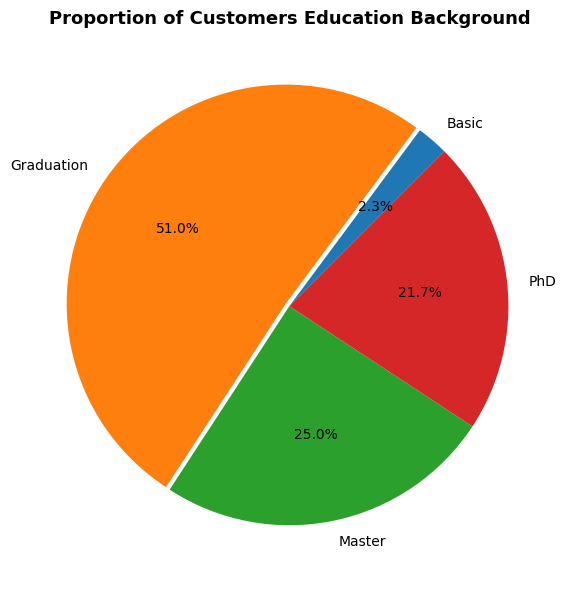

In [80]:
plt.figure(figsize=(10, 6))  # You can adjust the size by changing the width and height values

custEduSum = df.groupby('Education')['ID'].sum().reset_index()
custEduSum
custEduSum['totalPercentage'] = (custEduSum['ID'] / custEduSum['ID'].sum()) * 100
explode = [0, 0.02, 0, 0]

plt.title('Proportion of Customers Education Background', fontsize=13, fontweight='bold')
colors = ['#FF5733', '#C70039', '#900C3F', '#581845', '#2E4053', '#FFD700']
plt.pie(data=custEduSum, x='totalPercentage', labels=custEduSum['Education'],
        autopct='%.1f%%', startangle=45, explode=explode)
plt.tight_layout()

plt.show()


Berdasarkan proporsi pelanggan diatas, pelanggan dengan Education Background **Graduation** merupakan pelanggan terbanyak yang ada di supermarket X. Selanjutnya saya ingin melihat, apakah di setiap Education Background memiliki minat belanja yang tinggi berdasarkan Average Spending dan Amount Spend di setiap Kategori

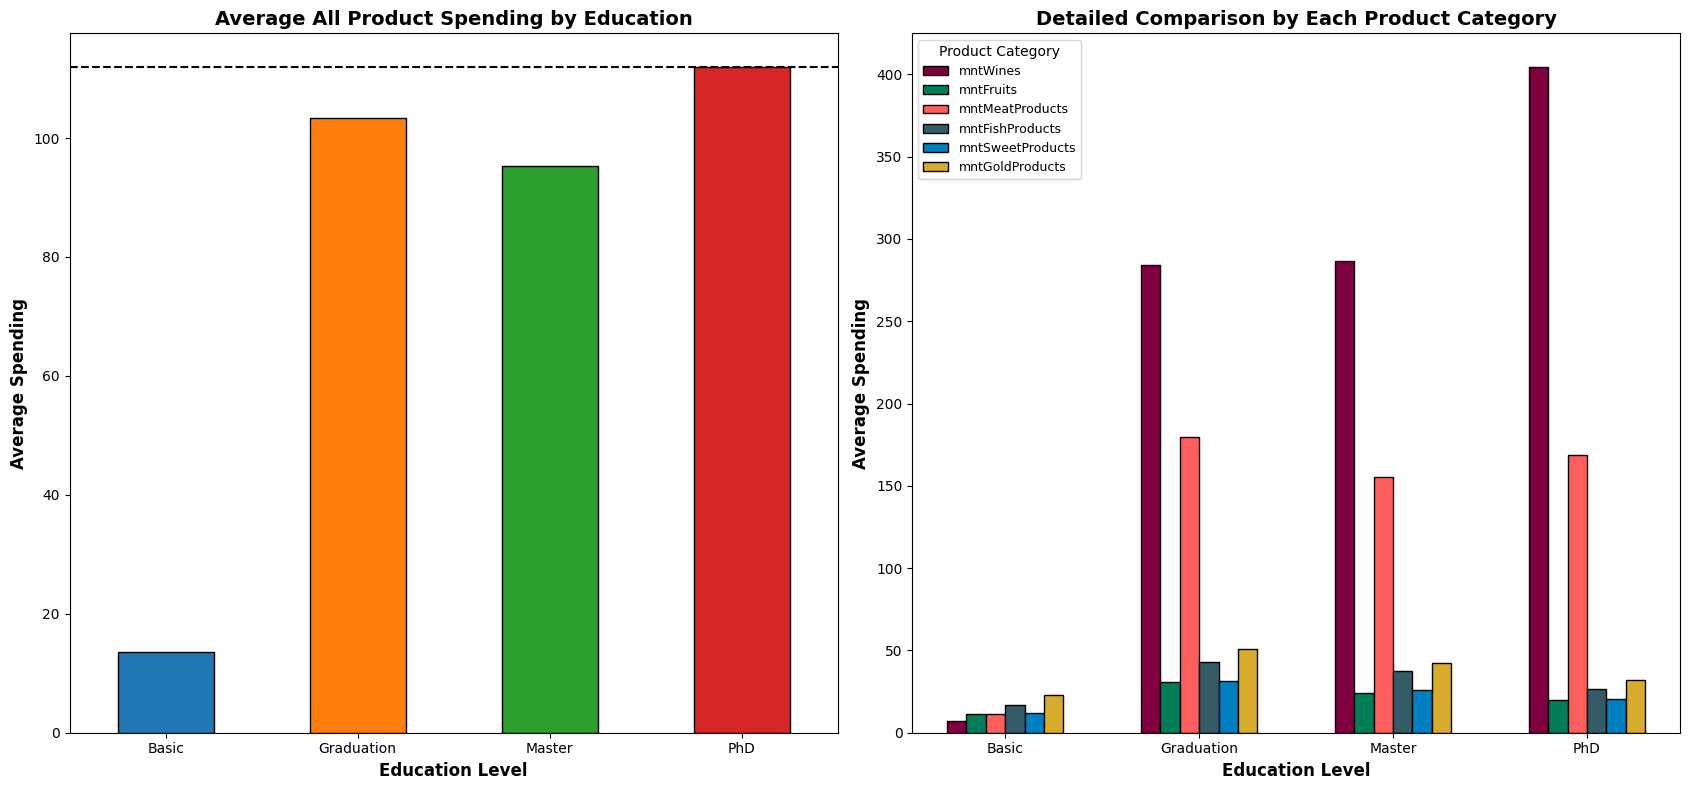

In [81]:
gradAvgSpend = df.groupby('Education')[['mntWines', 'mntFruits', 'mntMeatProducts', 'mntFishProducts', 'mntSweetProducts', 'mntGoldProducts']].mean().reset_index()
gradAvgSpend['totalSpend'] = gradAvgSpend[['mntWines', 'mntFruits', 'mntMeatProducts', 'mntFishProducts', 'mntSweetProducts', 'mntGoldProducts']].mean(axis=1)
fig, axes = plt.subplots(1, 2, figsize=(17, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
maxValue = gradAvgSpend['totalSpend'].max()
gradAvgSpend.plot(kind='bar', x='Education', y='totalSpend', color=colors, edgecolor='black', ax=axes[0], legend=False)
axes[0].set_xlabel('Education Level', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Average Spending', fontsize=12, fontweight='bold')
axes[0].set_title('Average All Product Spending by Education', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', labelrotation=0, labelsize=10)
axes[0].axhline(maxValue, color='black', linestyle='--')

legend_labels = ['mntWines', 'mntFruits', 'mntMeatProducts', 'mntFishProducts', 'mntSweetProducts', 'mntGoldProducts']
colors = ['#800040', '#017E59', '#FF5E5E', '#335c67', '#0080C0', '#D7AC2D']
position = np.arange(len(gradAvgSpend))
width = 0.1  # Width of each bar
bar_positions = [position + i * width for i in range(len(legend_labels))]
for i, (product, color, label) in enumerate(zip(legend_labels, colors, legend_labels)):
    axes[1].bar(bar_positions[i], gradAvgSpend[product], width=width, color=color, label=label, edgecolor='black')

axes[1].set_xlabel('Education Level', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Average Spending', fontsize=12, fontweight='bold')
axes[1].set_title('Detailed Comparison by Each Product Category', fontsize=14, fontweight='bold')
axes[1].legend(title='Product Category', fontsize=9)
axes[1].tick_params(axis='x', labelrotation=0, labelsize=10)
axes[1].set_xticks(position + width * (len(legend_labels) - 1) / 2)  # Set x-tick positions

# Set x-tick labels based on Education types
axes[1].set_xticklabels(gradAvgSpend['Education'])

plt.tight_layout()
plt.show()


Dari plot ini, terdapat beberapa insight yang dapat diambil:

1. **Perbandingan Rata-Rata Pengeluaran**: Plot pertama (sebelah kiri) menunjukkan perbandingan rata-rata pengeluaran produk untuk berbagai tingkat pendidikan. Insight yang bisa diambil adalah bahwa orang-orang dengan pendidikan **PhD**, cenderung memiliki rata-rata pengeluaran yang lebih tinggi daripada mereka yang memiliki pendidikan lebih rendah. Sehingga, pendidikan tampak memengaruhi pengeluaran.

2. **Perbandingan Pengeluaran Produk**: Plot kedua (sebelah kanan) memberikan perbandingan rata-rata pengeluaran untuk setiap produk kategori (anggur, buah, daging, ikan, produk manis, produk emas) berdasarkan tingkat pendidikan. Insight yang bisa diambil adalah preferensi belanja berbeda-beda tergantung pada kategori produk. Contohnya, orang-orang dengan gelar PhD cenderung menghabiskan lebih banyak pada produk anggur dan daging.

3. **Variasi Pengeluaran**: Terdapat variasi pengeluaran di antara kelompok pendidikan untuk beberapa produk. Ini dapat menjadi informasi yang berguna untuk strategi pemasaran. Misalnya, jika toko ingin meningkatkan penjualan produk daging, mereka dapat fokus pada pelanggan dengan pendidikan tertentu.

4. **Pendapatan Tertinggi**: Orang-orang dengan pendidikan **PhD** dan **Graduation** cenderung memiliki rata-rata pengeluaran yang lebih tinggi. Oleh karena itu, mungkin berguna untuk lebih memahami perilaku pembelian pelanggan dengan tingkat pendidikan ini dan menyesuaikan strategi pemasaran mereka.

Apabila dilihat lebih detil lagi, preferensi produk yang paling sering dibeli secara keseluruhan berdasarkan background pendidikan adalah pada kategori Wines dan Meat Products. Lalu produk-produk seperti Fruits, Fish, Sweets, dan Gold adalah kategori yang kurang diminati oleh para pelanggan. Namun berbeda dengan Background pendidikan **Basic** dimana mereka lebih besar pengeluarannya di kategori produk emas dan ikan. Hal ini kemungkinan terjadi karena Gold, selain bisa menjadi aksesoris, juga dapat digunakan untuk berinvestasi. Kemungkinan bagi mereka yang memiliki background pendidikan **Basic** lebih memilih untuk berinvestasi pada produk emas. Selain itu, apabila harga daging dibandingkan dengan ikan, harganya terpaut tinggi lebih mahal daging. 

Terdapat beberapa alasan mengapa latar belakang pendidikan dapat memengaruhi kapasitas finansial seseorang dan, akibatnya, pengeluaran mereka. Beberapa kemungkinan faktor yang berperan di antaranya adalah:
1. Pendapatan: Pelanggan yang mencapai tingkat pendidikan yang lebih tinggi seringkali memiliki akses ke pekerjaan yang membayar lebih tinggi. Ini dapat memengaruhi kemampuan mereka untuk berbelanja, sehingga mereka cenderung mampu melakukan pembelian dengan nilai yang lebih tinggi.
2. Gaya Hidup dan Preferensi: Tingkat pendidikan juga memiliki dampak pada gaya hidup dan preferensi individu. Orang dengan latar belakang pendidikan yang lebih tinggi mungkin memiliki selera yang lebih eksklusif terhadap produk atau merek tertentu. Ini bisa menjadi motivasi bagi mereka untuk berbelanja dengan nilai yang lebih tinggi.

#### - Apakah ada korelasi antara usia pada preferensi dan minat berbelanja?

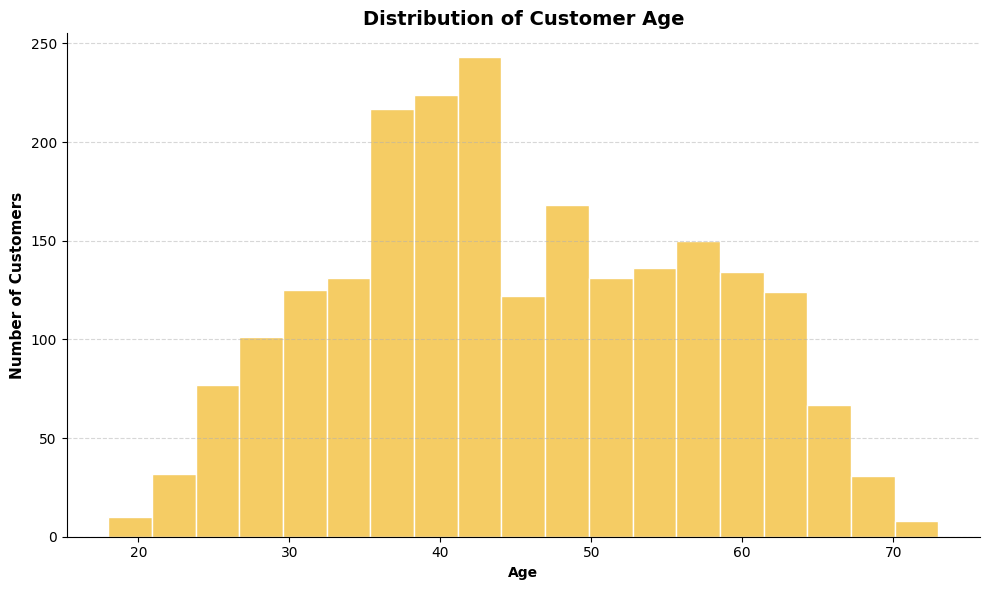

In [82]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=19, kde=False, edgecolor='white', color='#F2BB30')
plt.xlabel('Age', fontsize=10, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=11, fontweight='bold')
plt.title('Distribution of Customer Age', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine() 
plt.tight_layout()
plt.show()

Dari data yang telah divisualisasikan, tampak mayoritas pelanggan terdapat pada usia di bawah 80 tahun. Selain itu, hasil sebelumnya menunjukkan bahwa pelanggan dalam rentang usia 40-49 tahun memiliki minat yang tinggi terhadap penawaran diskon dan program kampanye. Oleh karena itu, saya tertarik untuk mengeksplorasi apakah kelompok usia 40-49 tahun juga memiliki minat belanja yang tinggi secara umum.

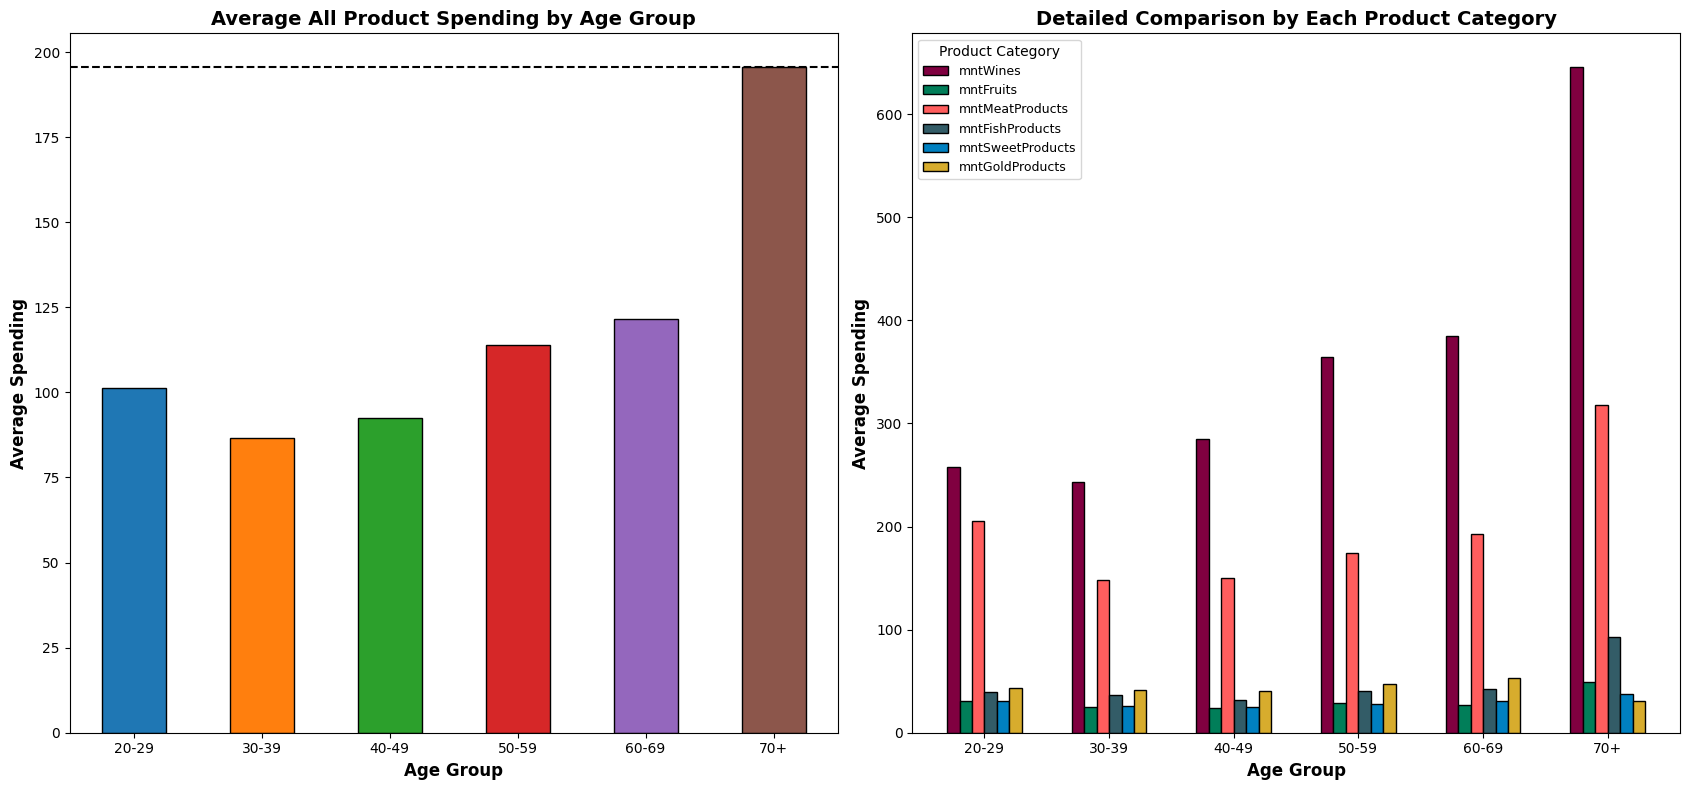

In [83]:
ageAvgSpend = df.groupby('ageGroup')[['mntWines', 'mntFruits', 'mntMeatProducts', 'mntFishProducts', 'mntSweetProducts', 'mntGoldProducts']].mean().reset_index()
ageAvgSpend['totalSpend'] = ageAvgSpend[['mntWines', 'mntFruits', 'mntMeatProducts', 'mntFishProducts', 'mntSweetProducts', 'mntGoldProducts']].mean(axis=1)

fig, axes = plt.subplots(1, 2, figsize=(17, 8))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
maxValue = ageAvgSpend['totalSpend'].max()
ageAvgSpend.plot(kind='bar', x='ageGroup', y='totalSpend', color=colors, edgecolor='black', ax=axes[0], legend=False)
axes[0].set_xlabel('Age Group', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Average Spending', fontsize=12, fontweight='bold')
axes[0].set_title('Average All Product Spending by Age Group', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', labelrotation=0, labelsize=10)
axes[0].axhline(maxValue, color='black', linestyle='--')

legend_labels = ['mntWines', 'mntFruits', 'mntMeatProducts', 'mntFishProducts', 'mntSweetProducts', 'mntGoldProducts']
colors = ['#800040', '#017E59', '#FF5E5E', '#335c67', '#0080C0', '#D7AC2D']
position = np.arange(len(ageAvgSpend))
width = 0.1  # Width of each bar
bar_positions = [position + i * width for i in range(len(legend_labels))]
for i, (product, color, label) in enumerate(zip(legend_labels, colors, legend_labels)):
    axes[1].bar(bar_positions[i], ageAvgSpend[product], width=width, color=color, label=label, edgecolor='black')

axes[1].set_xlabel('Age Group', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Average Spending', fontsize=12, fontweight='bold')
axes[1].set_title('Detailed Comparison by Each Product Category', fontsize=14, fontweight='bold')
axes[1].legend(title='Product Category', fontsize=9)
axes[1].tick_params(axis='x', labelrotation=0, labelsize=10)
axes[1].set_xticks(position + width * (len(legend_labels) - 1) / 2)  # Set x-tick positions

# Set x-tick labels based on Education types
axes[1].set_xticklabels(ageAvgSpend['ageGroup'])

plt.tight_layout()
plt.show()


Berdasarkan visualisasi diatas, dapat dilihat bahwa age group 70+ merupakan age group yang memiliki minat berbelanja dan preferensi produk tertinggi apabila dibandingkan dengan age group yang lain. Untuk kategori yang paling diminati, yaitu pada kategori anggur dan daging, sedangkan kategori yang kurang diminati yaitu pada produk ikan, buah, dan produk manis. Apabila dibandingkan dengan emas, pembelian emas masih lebih tinggi dibandingkan dengan produk-produk yang kurang diminati diatas. Hal ini kemungkinan terjadi karena selain emas dapat digunakan sebagai aksesoris, emas juga dapat digunakan untuk berinvestasi. Maka dari itu, perlu dilakukan evaluasi lebih lanjut terhadap produk-produk tersebut kira-kira hal ini terjadi dikarenakan produknya sendiri atau memang strategi pemasaran terhadap produk tersebut yang kurang efektif.  

Apabila kita melihat visualisasi sebelumnya mengenai hubungan usia dengan response campaign diatas, age group 40-49 tahun merupakan kelompok yang memiliki minat tertinggi terhadap campaign dan diskon pada supermarket X. Namun hal ini berbanding terbalik dengan hasil visualisasi mengenai total belanja dan preferensi tiap produk terhadap age group. Pada age group 40-49, mereka tidak melakukan pengeluaran sebanyak age group 70+. Meskipun sebelumnya age group 70+ merespon campaign terakhir dengan minat yang paling rendah, namun secara keseluruhan age group ini memiliki minat berbelanja yang paling tinggi. Ini bisa disebabkan oleh sejumlah faktor, termasuk aspek keuangan, preferensi produk, atau perubahan dalam pola belanja di kalangan kelompok usia ini. Untuk mendapatkan pemahaman yang lebih dalam tentang penyebabnya, diperlukan analisis yang lebih rinci terkait perilaku konsumen dan faktor-faktor yang memengaruhinya di antara anggota kelompok usia tersebut.  

Beberapa alasan mungkin menjelaskan mengapa kelompok usia 70+ memiliki rata-rata pembelian yang tinggi tetapi minat yang rendah untuk mengikuti kampanye dari supermarket:

1. Preferensi Belanja Konvensional: Kelompok usia yang lebih tua mungkin memiliki preferensi untuk berbelanja secara langsung di toko daripada melalui platform online. Mereka mungkin lebih suka melihat produk secara langsung sebelum membeli.

2. Kurangnya Kesadaran: Kemungkinan bahwa kelompok usia ini mungkin kurang sadar akan kampanye atau promosi yang ditawarkan oleh supermarket. Mungkin diperlukan upaya tambahan untuk mengkomunikasikan kampanye ini secara efektif kepada mereka.

3. Tidak Tertarik: Meskipun mereka melakukan pembelian dalam jumlah besar, mereka mungkin tidak tertarik pada kampanye tertentu yang ditawarkan oleh supermarket. Preferensi mereka mungkin lebih pada produk atau merek tertentu.

4. Pembelian Rutin: Kelompok usia 70+ mungkin memiliki pembelian yang lebih rutin dan dapat diandalkan. Kampanye mungkin tidak memengaruhi kebiasaan belanja mereka yang sudah mapan.

5. Preferensi Kebutuhan Pokok: Kelompok usia ini mungkin lebih fokus pada memenuhi kebutuhan pokok dan barang-barang sehari-hari daripada mengikuti kampanye yang bersifat opsional.

6. Kendala Fisik: Faktor-faktor seperti mobilitas yang terbatas atau kendala fisik lainnya dapat mempengaruhi minat mereka untuk mengikuti kampanye yang mungkin melibatkan perjalanan atau aktivitas fisik.

#### Apakah pelanggan yang sudah menikah cenderung berbelanja lebih besar daripada pelanggan yang belum menikah?

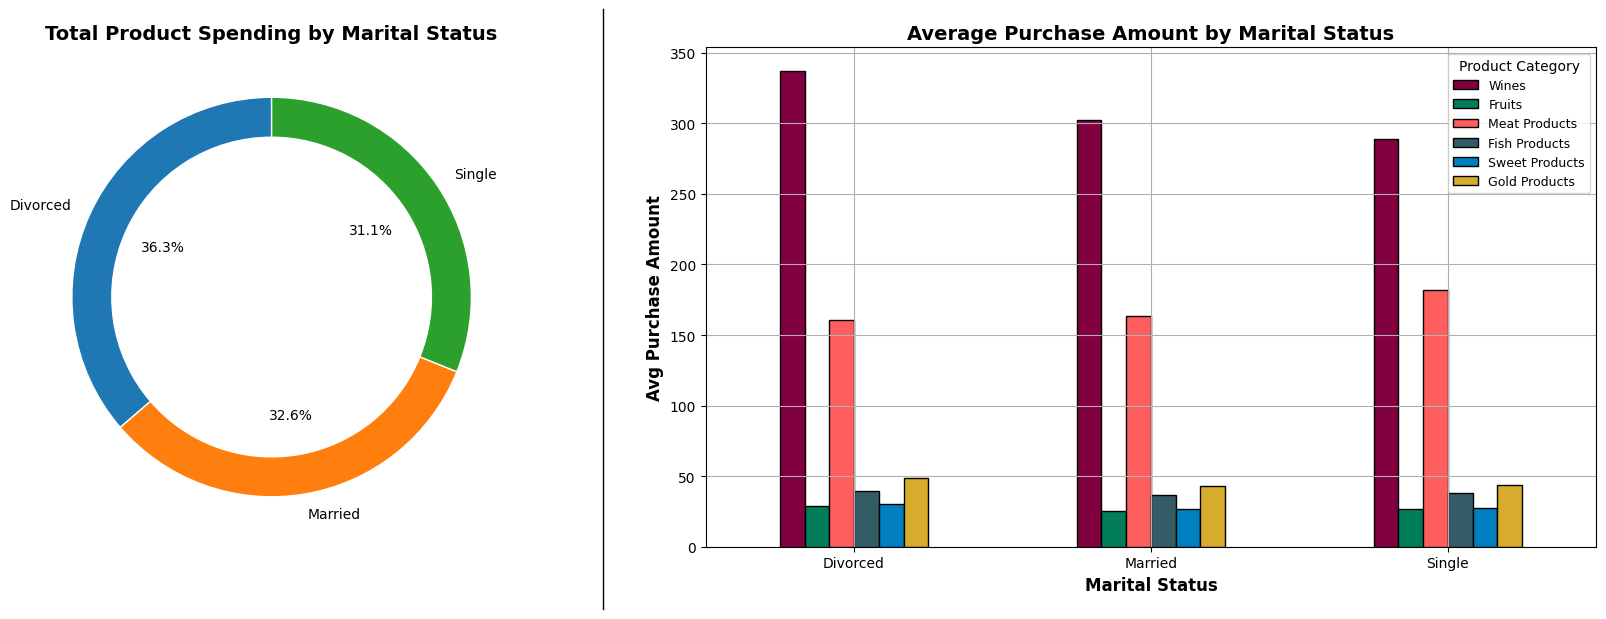

In [84]:
totalSpendMaritalStatus = df.groupby('maritalStatus')[['mntWines', 'mntFruits', 'mntMeatProducts', 'mntFishProducts', 'mntSweetProducts', 'mntGoldProducts']].mean()

fig, axes = plt.subplots(nrows=1, ncols=2)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
wedgeprops = {'width': 0.2, 'edgecolor': 'white'}
axes[0].pie(totalSpendMaritalStatus['mntWines'], labels=totalSpendMaritalStatus.index, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)
axes[0].set_title('Total Product Spending by Marital Status', fontsize=14, fontweight='bold')

legend_labels = ['Wines', 'Fruits', 'Meat Products', 'Fish Products', 'Sweet Products', 'Gold Products']
colors = ['#800040', '#017E59', '#FF5E5E', '#335c67', '#0080C0', '#D7AC2D']
totalSpendMaritalStatus.plot(kind='bar', ax=axes[1], width=0.5, color=colors, position=0.5, edgecolor='black')
axes[1].figure.set_size_inches(18, 6)
axes[1].set_xlabel('Marital Status', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Avg Purchase Amount', fontsize=12, fontweight='bold')
axes[1].set_title('Average Purchase Amount by Marital Status', fontsize=14, fontweight='bold')
axes[1].legend(legend_labels, title='Product Category', fontsize=9, loc='upper right')
axes[1].tick_params(axis='x', labelrotation=0, labelsize=10)
fig.add_artist(plt.Line2D([0.44, 0.44], [0, 1], color='black', linewidth=1, linestyle='-'))
plt.tight_layout()
plt.grid()
plt.show()

Dari grafik di atas, kita dapat menarik beberapa kesimpulan penting mengenai pengaruh status perkawinan terhadap pola pembelian pelanggan. Secara keseluruhan, tidak terdapat perbedaan yang signifikan dalam jumlah pembelian antara pelanggan yang sudah menikah dan yang belum menikah. Tetapi kita dapat melihat adanya tren yang menarik.

Pelanggan yang berstatus perkawinan **Menikah** dan **Bercerai** cenderung melakukan pembelian dalam jumlah yang lebih besar daripada pelanggan yang **belum menikah**. Pola pembelian dari kedua kelompok ini cukup mirip, dan mungkin ada faktor-faktor seperti tanggung jawab keluarga atau perubahan prioritas setelah bercerai yang memengaruhi pola ini.

Di sisi lain, pelanggan yang **belum menikah** juga terlihat melakukan pembelian dalam jumlah yang cukup besar, meskipun memiliki kebutuhan yang lebih sedikit. Ini mungkin disebabkan oleh faktor seperti tinggal bersama teman atau keluarga yang memengaruhi pola pembelian mereka.

Selain itu, produk-produk seperti wine dan daging tetap menjadi favorit di semua kelompok status perkawinan. Ini menunjukkan bahwa preferensi produk cenderung tetap konsisten, meskipun ada perbedaan dalam jumlah pembelian. Namun apabila dilihat lebih detil lagi, untuk status perkawinan **Cerai** lebih sering melakukan pengeluaran pada kategori produk emas apabila dibandingkan dengan status perkawinan yang lainnya. Dalam keseluruhan analisis, tidak terdapat perbedaan yang signifikan dalam preferensi produk antara ketiga kategori status perkawinan.

Dengan demikian, pemahaman terhadap perbedaan ini dapat membantu dalam merancang strategi pemasaran yang lebih tepat dan efektif untuk setiap kelompok pelanggan berdasarkan status perkawinan mereka.

#### - Apakah pelanggan yang sudah memiliki anak dapat mempengaruhi pola berbelanja?

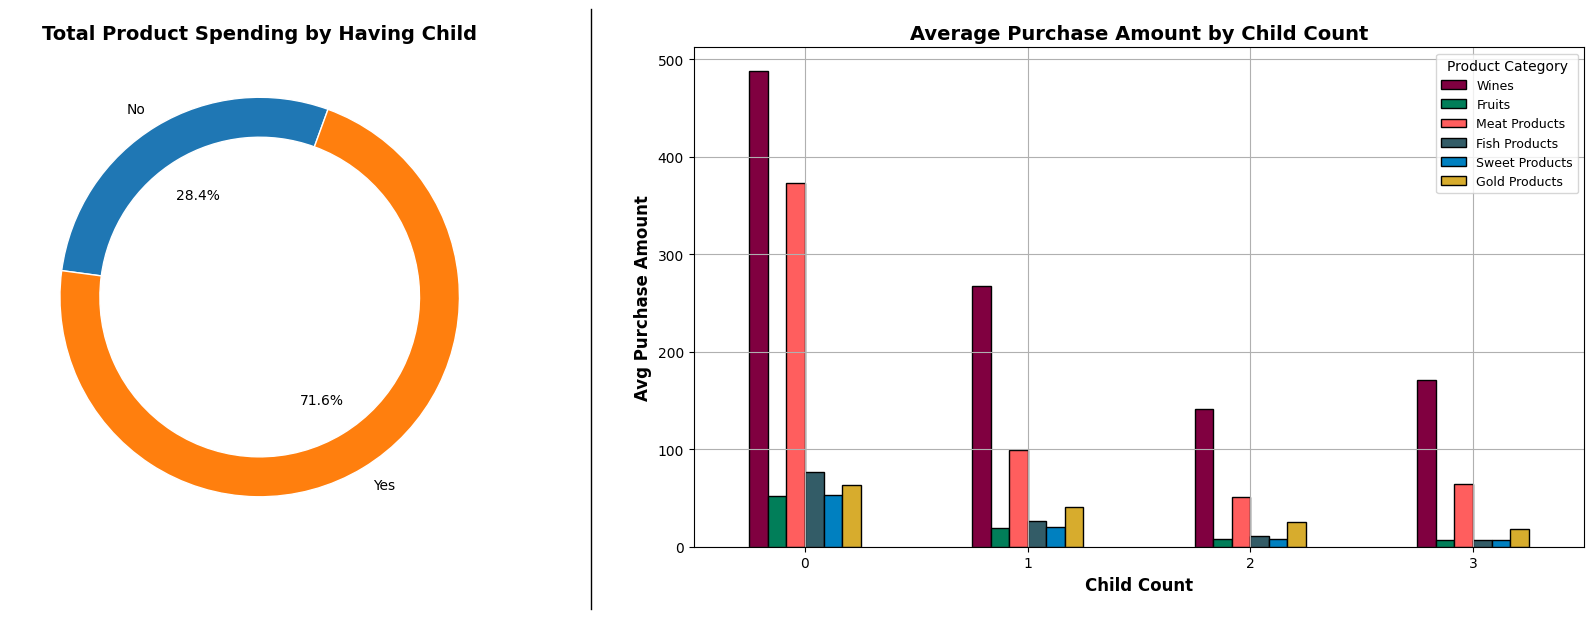

In [85]:
sumHaveChild = df.groupby('haveChild')[['ID']].sum()
totalChild = df.groupby('childCount')[['mntWines', 'mntFruits', 'mntMeatProducts', 'mntFishProducts', 'mntSweetProducts', 'mntGoldProducts']].mean()

fig, axes = plt.subplots(nrows=1, ncols=2)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
wedgeprops = {'width': 0.2, 'edgecolor': 'white'}
axes[0].pie(sumHaveChild['ID'], labels=sumHaveChild.index, colors=colors, autopct='%1.1f%%', startangle=70, wedgeprops=wedgeprops)
axes[0].set_title('Total Product Spending by Having Child', fontsize=14, fontweight='bold')

legend_labels = ['Wines', 'Fruits', 'Meat Products', 'Fish Products', 'Sweet Products', 'Gold Products']
colors = ['#800040', '#017E59', '#FF5E5E', '#335c67', '#0080C0', '#D7AC2D']
totalChild.plot(kind='bar', ax=axes[1], width=0.5, color=colors, position=0.5, edgecolor='black')
axes[1].figure.set_size_inches(18, 6)
axes[1].set_xlabel('Child Count', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Avg Purchase Amount', fontsize=12, fontweight='bold')
axes[1].set_title('Average Purchase Amount by Child Count', fontsize=14, fontweight='bold')
axes[1].legend(legend_labels, title='Product Category', fontsize=9, loc='upper right')
axes[1].tick_params(axis='x', labelrotation=0, labelsize=10)
fig.add_artist(plt.Line2D([0.44, 0.44], [0, 1], color='black', linewidth=1, linestyle='-'))
plt.tight_layout()
plt.grid()
plt.show()

Dari visualisasi diatas, dapat dilihat bahwa total pengeluaran yang dilakukan oleh pelanggan yang **memiliki anak**, lebih besar proporsinya apabila dibandingkan dengan pelanggan yang **tidak memiliki anak**. Tetapi apabila dilihat lagi secara detail per kategorinya, pelanggan yang **tidak memiliki anak** malah memiliki pengeluaran yang lebih banyak apabila dibandingkan dengan yang sudah memiliki anak. Namun hal ini terjadi karena, untuk kategori pelanggan yang **memiliki anak** dibagi menjadi 3 yaitu memiliki 1, 2, atau 3 anak. Namun apabila kategori memiliki anak ini digabung kembali akan lebih banyak pengeluaran yang dilakukan oleh pelanggan yang memiliki anak. Seperti yang dapat dilihat pada visualisasi yang pertama. 

Lalu, mengapa hal ini bisa terjadi?

1. Prioritas Pengeluaran: Apabila dilihat secara detail, pelanggan yang **tidak memiliki anak** memiliki preferensi dan **total spend** yang lebih besar untuk membeli anggur dan daging dibandingkan dengan kategori produk yang lain. Lalu mengalami penurunan pembelian seiring dengan bertambahnya jumlah anak. Hal ini kemungkinan dikarenakan, pelanggan yang masih belum mempunyai anak, masih belum ada keluarga dan lebih memilih untuk melakukan pengeluaran yang bersifat self-centric, dimana dia lebih memfokuskan pada hal-hal yang dapat membuatnya bahagia, tanpa adanya tanggung jawab keluarga.

2. Perubahan Gaya Hidup: Kehadiran anak dapat mengakibatkan perubahan dalam pola hidup keluarga. Orang tua mungkin lebih memperhatikan aspek-aspek sehat dan gizi, sehingga mereka cenderung memprioritaskan pembelian ikan dan buah-buahan yang dianggap sehat dan bergizi untuk seluruh keluarga dan mengurangi melakukan pembelian yang bersifat self-centric. Selain itu, keinginan untuk mengurangi konsumsi gula dalam makanan juga bisa memengaruhi pembelian produk manis, terutama dalam rangka memberikan pola makan yang lebih sehat bagi anak-anak.

3. Stabilitas Keuangan: Memiliki anak dapat memengaruhi stabilitas keuangan keluarga. Kenaikan pengeluaran, seperti biaya pendidikan, perawatan anak, dan kebutuhan sehari-hari lainnya, mungkin membuat orang tua lebih berhati-hati dalam mengalokasikan dana untuk pembelian barang-barang mewah seperti wine, daging, dan emas. Mereka cenderung lebih bijak dalam mengelola keuangan keluarga demi menjamin kesejahteraan anak-anak dan keluarga secara keseluruhan.

### 2. Evaluasi Channel Pemasaran yang Paling Efisien.  

In [86]:
custStorePurchases = df.loc[df['numStorePurchases'] > 0, ['ID', 'numStorePurchases']].sort_values(by='numStorePurchases', ascending=False)
custStorePurchases = custStorePurchases.set_index('ID')
custStorePurchases

,numStorePurchases
ID,
6417,13
1453,13
819,13
6312,13
9723,13
...,...
6237,1
1501,1
5336,1


In [87]:
custWebPurchases = df.loc[df['numWebPurchases'] > 0, ['ID', 'numWebPurchases']].sort_values(by='numWebPurchases', ascending=False)
custWebPurchases = custWebPurchases.set_index('ID')
custWebPurchases

,numWebPurchases
ID,
5255,27
4619,27
10311,25
6237,23
8931,11
...,...
663,1
2521,1
4550,1


In [88]:
custCatalogPurchases = df.loc[df['numCatalogPurchases'] > 0, ['ID', 'numCatalogPurchases']].sort_values(by='numCatalogPurchases', ascending=False)
custCatalogPurchases = custCatalogPurchases.set_index('ID')
custCatalogPurchases

,numCatalogPurchases
ID,
1501,28
5376,28
4931,28
8475,22
4964,11
...,...
7327,1
115,1
8299,1


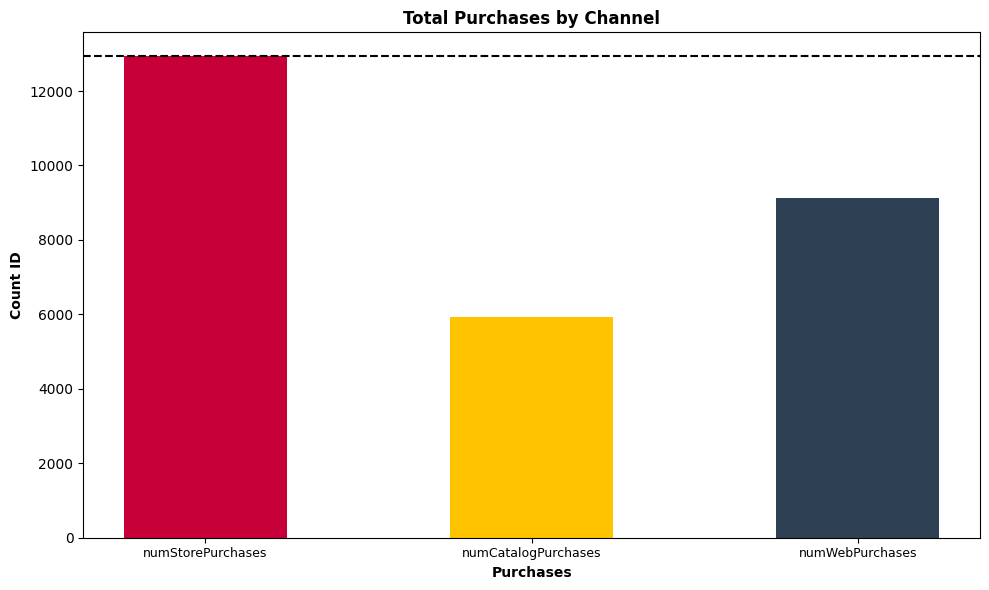

In [89]:
plt.figure(figsize=(10, 6))

channelPurchases = df[['numStorePurchases', 'numCatalogPurchases', 'numWebPurchases']].sum()

x = channelPurchases.index  
y = channelPurchases.values 

plt.bar(x, y, color=['#C70039', '#FFC300', '#2E4053'], width=0.5)

plt.xlabel('Purchases', fontsize=10, fontweight='bold')
plt.ylabel('Count ID', fontsize=10, fontweight='bold')
plt.title('Total Purchases by Channel', fontsize=12, fontweight='bold')

plt.xticks(fontsize=9)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.axhline(y.max(), linestyle='--', linewidth=1.5, color='black')
plt.show()


<a id="channelPurchases"></a>
Dari bar plot di atas, dapat disimpulkan bahwa penjualan melalui saluran web dan katalog tidak menunjukkan perbedaan signifikan pada periode tahun 2012-2014. Hal ini mengindikasikan bahwa pada saat itu, penjualan online belum mencapai tingkat popularitas seperti saat ini. Meskipun internet semakin umum digunakan, masih ada sebagian konsumen yang lebih nyaman berbelanja melalui katalog cetak atau mungkin memiliki keterbatasan akses internet.

Pembelian langsung ke toko fisik tetap mendominasi, dan hal ini dapat dijelaskan oleh beberapa faktor:
1. **Pengalaman langsung:** Toko fisik memberikan pengalaman langsung kepada pelanggan. Mereka dapat melihat, dan mencoba secara langsung sebuah produk sebelum memutuskan untuk membeli. Hal ini memberikan kepercayaan dan kepuasan lebih tinggi karena konsumen dapat memeriksa kualitas produk sebelum pembelian. Hal ini berbeda apabila dibandingkan dengan pembelian dari katalog atau web, dimana pelanggan hanya dapat melihat informasi mengenai produk tersebut dan gambar dari produk tersebut. 

2. **Interaksi dengan tenaga penjual:** Di toko fisik, konsumen dapat berinteraksi langsung dengan tenaga penjual yang dapat memberikan informasi dan rekomendasi produk. Ini memberikan pengalaman yang lebih personal dan membantu dalam pengambilan keputusan. Berbeda dengan berbelanja melewati web maupun katalog, pelanggan hanya bisa bertanya pada customer service dan membutuhkan kesabaran untuk menunggu balasan dari customer service. 

3. **Kecepatan dan kepastian:** Pembelian langsung di toko memungkinkan konsumen membawa produk pulang segera setelah pembelian tanpa menunggu pengiriman. Ini penting untuk produk yang dibutuhkan dengan segera atau bagi konsumen yang tidak memiliki akses mudah ke pembelian online. 

Jadi, meskipun penjualan online pada tahun tersebut mulai berkembang, konsumen masih menghargai pengalaman dan kecepatan yang ditawarkan oleh toko fisik.

#### Proporsi Segmentasi Pelanggan


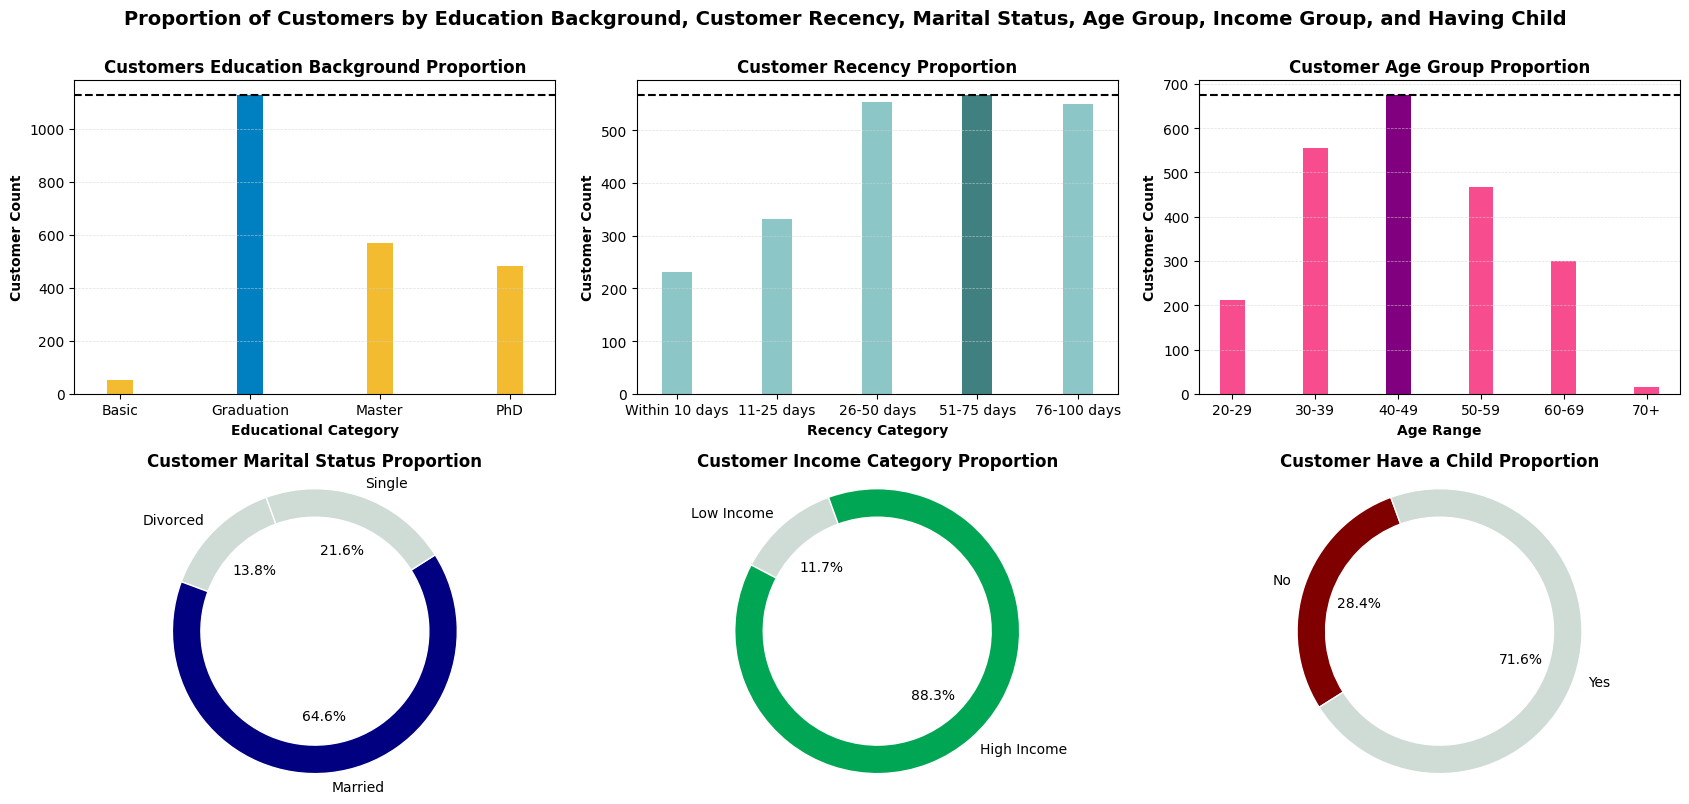

In [90]:
eduBackgroundProportion = df.groupby('Education')['ID'].count()
recencyProportion = df.groupby('recencyCategory')['ID'].count()
ageGroupProportion = df.groupby('ageGroup')['ID'].count()
maritalStatusProportion = df.groupby('maritalStatus')['ID'].count()
incomeCatProportion = df.groupby('incomeCategory')['ID'].count()
haveChildProportion = df.groupby('haveChild')['ID'].count()

fig = plt.figure(figsize=(17, 8))

eduMaxValue = eduBackgroundProportion.max()
plt.subplot(2, 3, 1)
eduBackgroundProportion.plot(kind='bar', color=['#0080C0' if x == eduMaxValue else '#F2BB30' for x in eduBackgroundProportion], width=0.2)
plt.xlabel('Educational Category', fontweight='bold')
plt.ylabel('Customer Count', fontweight='bold')
plt.title('Customers Education Background Proportion', fontweight='bold')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='lightgray', alpha=0.7)
plt.xticks(range(len(eduBackgroundProportion)), eduBackgroundProportion.index, rotation=0, ha='center')
plt.axhline(eduMaxValue, color='black', linestyle='--')

recencyMaxValue = recencyProportion.max()
plt.subplot(2, 3, 2)
recencyProportion.plot(kind='bar', color=['#408080' if x == recencyMaxValue else '#8CC6C6' for x in recencyProportion], width=0.3)
plt.xlabel('Recency Category', fontweight='bold')
plt.ylabel('Customer Count', fontweight='bold')
plt.title('Customer Recency Proportion', fontweight='bold')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='lightgray', alpha=0.7)
plt.xticks(range(len(recencyProportion)), recencyProportion.index, rotation=0, ha='center')
plt.axhline(recencyMaxValue, color='black', linestyle='--')

ageMaxValue = ageGroupProportion.max()
plt.subplot(2, 3, 3)
ageGroupProportion.plot(kind='bar', color=['#800080' if x == ageMaxValue else '#F74C8D' for x in ageGroupProportion], width=0.3)
plt.xlabel('Age Range', fontweight='bold')
plt.ylabel('Customer Count', fontweight='bold')
plt.title('Customer Age Group Proportion', fontweight='bold')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='lightgray', alpha=0.7)
plt.xticks(range(len(ageGroupProportion)), ageGroupProportion.index, rotation=0, ha='center')
plt.axhline(ageMaxValue, color='black', linestyle='--')

maritalMaxValue = maritalStatusProportion.max()
plt.subplot(2, 3, 4)
wedgeprops = {'width': 0.2, 'edgecolor': 'white'}
maritalStatusProportion.plot(kind='pie', colors=['#000080' if x == maritalMaxValue else '#cfdbd5' for x in maritalStatusProportion], 
                               autopct='%1.1f%%', startangle=110, wedgeprops=wedgeprops)
plt.xlabel('')
plt.ylabel('')
plt.title('Customer Marital Status Proportion', fontsize=12, fontweight='bold')
plt.axis('equal')

incomeMaxValue = incomeCatProportion.max()
plt.subplot(2, 3, 5)
wedgeprops = {'width': 0.2, 'edgecolor': 'white'}
incomeCatProportion.plot(kind='pie', colors=['#00A653' if x == incomeMaxValue else '#cfdbd5' for x in incomeCatProportion], 
                        autopct='%1.1f%%', startangle=110, wedgeprops=wedgeprops)
plt.xlabel('')
plt.ylabel('')
plt.title('Customer Income Category Proportion', fontsize=12, fontweight='bold')
plt.axis('equal')

plt.subplot(2, 3, 6)
wedgeprops = {'width': 0.2, 'edgecolor': 'white'}
haveChildProportion.plot(kind='pie', colors=['#800000' if x == 'No' else '#cfdbd5' for x in haveChildProportion.index], 
                       autopct='%1.1f%%', startangle=110, wedgeprops=wedgeprops)
plt.xlabel('')
plt.ylabel('')
plt.title('Customer Have a Child Proportion', fontsize=12, fontweight='bold')
plt.axis('equal')

plt.suptitle('Proportion of Customers by Education Background, Customer Recency, Marital Status, Age Group, Income Group, and Having Child', fontsize=14, y=1, fontweight='bold')
plt.tight_layout()

plt.show()

<a id="marketSegmentation"> </a>
Berdasarkan visualisasi diatas, dapat disimpulkan bahwa terdapat beberapa kesamaan antara proporsi segmentasi pelanggan dengan segmentasi yang dilakukan pada kampanye terakhir yang dapat dilihat <a href="#segmentation">disini</a>, dimana mayoritas dari pelanggan ini merupakan lulusan Sarjana keatas, berumur 40-49 tahun, sudah menikah, dan memiliki pendapatan yang tinggi. 

Namun, untuk segmentasi pelanggan berupa recency dan memiliki anak sedikit berbeda, dimana pada segmentasi recency berdasarkan last campaign yang dominan merupakan pelanggan yang pembelian terakhirnya 11-25 hari. Namun pada proporsi berdasarkan segmentasi pelanggan, yang dominan adalah pelanggan yang pembelian terakhirnya 51-75 hari, lalu disusul oleh pelanggan yang pembelian terakhirnya 26-50 hari. Hal ini merupakan hal yang wajar, karena biasanya pelanggan supermarket hanya akan datang dan melakukan pembelian pada kurun waktu setiap bulan untuk membeli kebutuhan sehari-harinya. Maka dapat disimpulkan bahwa pelanggan yang melakukan pembelian terakhirnya 26-50 hari merupakan kategori recency yang paling dominan pada kedua topik. dimana pada kategori tersebut, jumlah pelanggannya stabil dan tidak mengalami penurunan sama sekali atau kenaikan. 

Namun untuk pelanggan yang memiliki anak, pada segmentasi pelanggan berdasarkan last campaign yang mendominasi merupakan pelanggan yang tidak mempunyai anak, padahal proporsi segmentasi pelanggan menunjukkan bahwa lebih banyak pelanggan supermarket yang sudah menikah. Hal ini dapat disimpulkan bahwa, pelanggan yang tidak memiliki anak justru lebih merespon kampanye apabila dibandingkan dengan pelanggan yang sudah memiliki anak. Hal ini menunjukkan bahwa dengan menargetkan segmen-segmen tersebut menjadi target pasar akan sangat dianjurkan, karena sudah jelas dari segmen-segmen yang telah disebutkan diatas, merekalah yang memberikan keuntungan lebih besar kepada pihak supermarket X

Maka dari itu, segmentasi pelanggan yang paling cocok untuk dijadikan target pasar, yaitu:
1. Pelanggan dengan background pendidikan sarjana
2. Pelanggan yang berumur 40-49 tahun
3. Pelanggan yang sudah menikah
4. Pelanggan yang memiliki pendapatan yang tinggi
5. Pelanggan yang melakukan pembelian terakhir 26-50 hari
6. Pelanggan yang tidak memiliki anak

Dengan adanya 6 segmentasi pelanggan tersebut, supermarket dapat lebih mudah untuk merancang strategi pemasaran yang lebih efektif, menyesuaikan produk atau layanan, dan membangun hubungan yang lebih kuat dengan pelanggan potensial yang memiliki karakteristik ini.

## Kesimpulan dan Rekomendasi Strategi Pemasaran

### Kesimpulan

Dari analisis yang telah dilakukan, kesimpulan yang dapat diambil mengenai segmentasi pasar ini adalah:

1. Supermarket memiliki tingkat pertumbuhan member yang cukup fluktuatif pada setiap bulannya selama 2 tahun ini. Pelanggan yang mendaftar menjadi member tertinggi yaitu pada bulan Agustus 2012. Sedangkan yang terendah yaitu pada bulan Juni 2014. Lihat grafiknya <a href="#growth"> disini </a>

2. Segmentasi pelanggan yang merespon kampanye terakhir terbanyak yaitu pelanggan dengan background pendidikan **Graduation**, recency pelanggan **11-25 hari**, berumur **40-49 tahun**, dengan status pernikahan **Married**, termasuk dalam kategori pendapatan **High Income**, dan tidak memiliki anak. Lihat grafiknya <a href="#segmentation"> disini </a>

3. **Tingkat Pendidikan Tinggi:** Sebagian besar pelanggan pada kelompok ini memiliki tingkat pendidikan yang tinggi, seperti lulusan sarjana, master, dan PhD. Tingkat pendidikan yang tinggi seringkali berkaitan dengan pengetahuan yang lebih luas, minat dalam inovasi, dan kemampuan untuk membuat keputusan pembelian yang cerdas. Oleh karena itu, membidik kelompok ini dapat membuka potensi pasar yang lebih cakap secara finansial dan berorientasi pada kualitas.

4. **Daya Beli dan Stabilitas Keuangan:** Kelompok usia 40-49 cenderung berada dalam fase kehidupan yang lebih stabil secara finansial. Mereka biasanya sudah mencapai puncak karir mereka dan memiliki pendapatan yang lebih tinggi daripada kelompok usia yang lebih muda. Hal ini menandakan daya beli yang lebih kuat dan kemampuan untuk berinvestasi dalam produk atau layanan dengan nilai yang lebih tinggi.

5. **Status Pernikahan yang Stabil:** Kebanyakan pelanggan pada kelompok ini sudah menikah, yang berarti mereka mungkin memiliki tanggung jawab keuangan yang lebih besar. Pendapatan keluarga dapat dikombinasikan, memberikan potensi daya beli yang lebih besar. Dengan memahami kebutuhan dan preferensi keluarga, bisnis dapat menawarkan produk dan layanan yang sesuai, menciptakan peluang untuk pertumbuhan bisnis yang berkelanjutan. 

6. **Kategori Pendapatan Tinggi:** Sebagian besar pelanggan pada kelompok ini termasuk dalam kategori pendapatan tinggi. Kelompok dengan pendapatan tinggi lebih mungkin untuk mengeluarkan lebih banyak uang dalam berbagai kategori produk. Dengan berfokus pada kelompok ini, bisnis memiliki peluang untuk meningkatkan penjualan dan pendapatan secara signifikan.

7. **Loyalitas Pelanggan dan Intensitas Berbelanja:** Pelanggan yang kembali berbelanja lagi pada 26-50 hari setelahnya merupakan target pasar yang baik karena pelanggan tersebut bisa dikatakan pelanggan yang memiliki loyalitas, dimana mereka akan selalu kembali 26-50 hari setelah melakukan pembelanjaan terakhirnya untuk menyetok kembali bahan-bahan makanan dan kebutuhannya di supermarket X. 

8. **Pelanggan yang Belum Mempunyai Anak:** Kebanyakan pelanggan yang ada pada supermarket merupakan pelanggan yang sudah memiliki anak, namun pelanggan yang belum mempunyai anak berdasarkan kampanye terakhir, memberikan respon lebih tinggi dibandingkan dengan pelanggan yang sudah memiliki anak. Hal ini kemungkinan terjadi karena pelanggan tersebut, masih belum memiliki tanggung jawab sebesar pelanggan yang sudah memiliki anak, dimana ia bisa menggunakan waktunya sendiri dengan lebih leluasa dibandingkan yang belum memiliki anak. Selain itu, pelanggan tersebut juga dapat mengeluarkan uangnya lebih leluasa juga dibandingkan dengan pelanggan yang sudah memiliki anak karena pelanggan yang sudah memiliki anak akan cenderung melakukan pertimbangan yang lebih banyak untuk melakukan pengeluaran dibandingkan pelanggan yang belum memiliki anak. 

9. **Channel Penjualan:** Penjualan melalui saluran web dan katalog tidak menunjukkan perbedaan yang signifikan selama periode 2012-2014. Pembelian langsung di toko fisik tetap mendominasi. Ini disebabkan oleh pengalaman langsung yang ditawarkan oleh toko fisik, interaksi dengan tenaga penjual, serta kecepatan dan kepastian pembelian. Konsumen lebih suka melihat dan mencoba produk secara langsung, berinteraksi dengan tenaga penjual, dan membawa produk pulang segera setelah pembelian di toko fisik. Mereka juga lebih memilih pengalaman tersebut daripada pembelian melalui web atau katalog. Lihat grafiknya <a href="#channelPurchases">disini</a>

10. **Target Pasar:** Ditemukan kesamaan antara segmentasi pelanggan dan hasil kampanye terakhir. Mayoritas pelanggan adalah lulusan sarjana ke atas, berusia 40-49 tahun, sudah menikah, dan berpendapatan tinggi. Namun, ada perbedaan di segmen recency, dengan mayoritas pembelian terjadi dalam 26-50 hari terakhir. Terlihat pula bahwa kampanye terakhir lebih diminati oleh pelanggan tanpa anak, meskipun mayoritas pelanggan supermarket sudah menikah. Oleh karena itu, target pasar yang tepat adalah pelanggan lulusan sarjana ke atas, berusia 40-49 tahun, sudah menikah, berpendapatan tinggi, pelanggan yang berbelanja dalam 26-50 hari terakhir, dan pelanggan yang tidak memiliki anak. Dengan segmentasi ini, strategi pemasaran dapat lebih efektif dan produk dapat disesuaikan dengan preferensi pelanggan, memperkuat hubungan dengan pelanggan potensial yang memiliki karakteristik ini. Lihat grafiknya <a href="#marketSegmentation">disini</a>


### Rekomendasi

Berikut adalah beberapa rekomendasi untuk meningkatkan program kampanye supermarket, menjaga minat pelanggan dalam bergabung dalam program keanggotaan, dan membuat program kampanye lebih efektif serta relevan:

1. **Personalisasi Kampanye:** Dengan memanfaatkan data pelanggan yang telah dikumpulkan, supermarket dapat menciptakan kampanye yang lebih personal. Ini mencakup penawaran dan rekomendasi produk yang disesuaikan dengan preferensi pembelian sebelumnya. Personalisasi meningkatkan minat pelanggan untuk berpartisipasi dalam kampanye.

2. **Penawaran Eksklusif Anggota:** Berikan insentif eksklusif kepada anggota program keanggotaan, seperti diskon tambahan, penawaran beli satu gratis satu, atau akses awal ke penjualan produk terbaru. Ini akan memberikan anggota alasan yang jelas untuk tetap aktif dalam program.

3. **Program Reward yang Menarik:** Perbarui program reward untuk memberikan lebih banyak manfaat bagi anggota yang aktif. Contohnya adalah poin reward yang dapat ditukar dengan produk, hadiah, atau diskon eksklusif. Semakin besar nilai hadiah yang dapat diperoleh, semakin besar insentif bagi pelanggan.

4. **Kampanye Retensi Anggota:** Selain menarik pelanggan baru, fokus pada mempertahankan anggota yang sudah ada. Buat kampanye khusus yang ditujukan untuk anggota yang telah lama bergabung, untuk memastikan mereka tetap aktif dan terlibat dalam program keanggotaan.

5. **Kampanye Berdasarkan Data Riwayat Belanja:** Analisis data riwayat belanja anggota untuk memahami pola belanja mereka. Dengan pemahaman ini, buat kampanye yang mengaitkan produk yang relevan dengan pembelian sebelumnya atau tawarkan diskon pada produk yang sering mereka beli.

6. **Program Referral:** Inisiatifkan program referral yang memberikan hadiah kepada anggota yang merujuk teman atau keluarga untuk bergabung dalam program keanggotaan. Hal ini akan memperluas jaringan anggota dan mendatangkan pelanggan baru.

7. **Komunikasi Rutin:** Jaga komunikasi yang rutin dengan anggota melalui email, pesan teks, atau notifikasi aplikasi. Berikan informasi tentang penawaran, promosi, dan update program keanggotaan. Pastikan anggota tetap tahu manfaat apa yang mereka dapatkan.

8. **Evaluasi dan Umpan Balik:** Secara rutin minta umpan balik dari anggota tentang program keanggotaan, kampanye, dan pengalaman berbelanja mereka. Evaluasi dan perbarui program berdasarkan umpan balik ini.

9. **Kampanye Berorientasi Target:** Gunakan segmentasi pelanggan yang telah dianalisis untuk mengarahkan kampanye kepada kelompok target yang paling mungkin merespons. Ini memastikan penggunaan sumber daya pemasaran dengan efektif dan memaksimalkan hasil kampanye.

10. **Channel Pemasaran:** Untuk channel pemasaran memang yang disukai oleh pelanggan adalah Store Purchase, namun perusahaan tetap harus untuk meningkatkan channel pemasaran atau pembelian lainnya seperti pada website dan katalog untuk meningkatkan keuntungan. Hal-hal yang dapat dilakukan seperti membangunan situs web yang lebih intuitif, keamanan transaksi online yang kuat, serta menawarkan produk yang menarik secara online. Promosi khusus untuk pembelian online juga dapat meningkatkan minat pelanggan. Lalu untuk katalog, supermarket dapat mengembangkan katalog digital yang interaktif. Ini dapat mencakup tautan langsung ke produk di situs web atau tawaran khusus yang hanya tersedia dalam versi digital.

11. **Pengukuran Kinerja:** Pantau kinerja kampanye secara rutin. Evaluasi angka-angka seperti angka keanggotaan baru, frekuensi pembelian anggota, dan nilai rata-rata transaksi. Hal ini membantu dalam mengidentifikasi apa yang berhasil dan apa yang perlu perbaikan.

12. **Umpan Balik Pelanggan:** Mendengarkan umpan balik pelanggan adalah kunci. Supermarket harus meminta pendapat pelanggan secara rutin untuk memahami kebutuhan, kekhawatiran, dan preferensi mereka. Umpan balik ini harus diterapkan dalam perbaikan produk dan layanan.

13. **Mengukur Kinerja Kampanye:** Setelah meluncurkan kampanye, penting untuk mengukur kinerjanya. Melalui analisis hasil kampanye, supermarket dapat mengevaluasi apa yang berhasil dan apa yang tidak. Hal ini memungkinkan untuk peningkatan berkelanjutan dalam kampanye mendatang.

14. **Analisis Data Berkelanjutan:** Supermarket perlu melanjutkan analisis data secara berkala untuk memantau perubahan dalam perilaku pelanggan. Dengan pemahaman yang lebih mendalam tentang bagaimana pelanggan berbelanja, supermarket dapat menyesuaikan strategi mereka.

Dengan menerapkan rekomendasi ini, program keanggotaan supermarket akan lebih efektif, anggota yang sudah ada akan tetap aktif, dan pelanggan baru akan tertarik untuk bergabung. Ini akan menciptakan keuntungan yang lebih besar dan pertumbuhan yang berkelanjutan bagi supermarket.

[Tableau Public](https://public.tableau.com/app/profile/aryo.atha.rizaldi/viz/ProjectCapstone2SupermarketXAnalysis/SupermarketStory?publish=yes)
